## G2M insight for Cab Investment firm ( Must for all Specialization) 



1. Business Problem

The Client XYZ is a private firm in US. Due to remarkable growth in the Cab Industry in last few years and multiple key players in the market, it is planning for an investment in Cab industry and as per their Go-to-Market(G2M) strategy they want to understand the market before taking final decision.


2. Data Set:

You have been provided 4 individual data sets. Time period of data is from 31/01/2016 to 31/12/2018.

Below are the list of datasets which are provided for the analysis:

Cab_Data.csv – this file includes details of transaction for 2 cab companies

Customer_ID.csv – this is a mapping table that contains a unique identifier which links the customer’s demographic details

Transaction_ID.csv – this is a mapping table that contains transaction to customer mapping and payment mode

City.csv – this file contains list of US cities, their population and number of cab users

You should fully investigate and understand each data set.

    Review the Source Documentation
    Understand the field names and data types
    Identify relationships across the files
    Field/feature transformations
    Determine which files should be joined versus which ones should be appended
    Create master data and explain the relationship
    Identify and remove duplicates
    Perform other analysis like NA value and outlier detection


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import math
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

## 1. Data Collection and Initial Processing

In [2]:
df1 = pd.read_csv("/home/equipo/Documents/Job/courses/DataGlacier/DataSets/Cab_Data.csv")

In [3]:
df2 = pd.read_csv("/home/equipo/Documents/Job/courses/DataGlacier/DataSets/City.csv")

In [4]:
df3 = pd.read_csv("/home/equipo/Documents/Job/courses/DataGlacier/DataSets/Transaction_ID.csv")

In [5]:
df4 = pd.read_csv("/home/equipo/Documents/Job/courses/DataGlacier/DataSets/Customer_ID.csv")

In [6]:
df5 = pd.read_csv("/home/equipo/Documents/Job/courses/DataGlacier/DataSets/US Holiday Dates (2004-2021).csv")

In [7]:
df1.shape


(359392, 7)

In [8]:
df2.shape

(20, 3)

In [9]:
df3.shape


(440098, 3)

In [10]:
df4.shape

(49171, 4)

In [11]:
df5.shape

(342, 6)

In [12]:
df1.head()

Transaction ID  Date of Travel   Company        City  KM Travelled  \
0        10000011           42377  Pink Cab  ATLANTA GA         30.45   
1        10000012           42375  Pink Cab  ATLANTA GA         28.62   
2        10000013           42371  Pink Cab  ATLANTA GA          9.04   
3        10000014           42376  Pink Cab  ATLANTA GA         33.17   
4        10000015           42372  Pink Cab  ATLANTA GA          8.73   

   Price Charged  Cost of Trip  
0         370.95       313.635  
1         358.52       334.854  
2         125.20        97.632  
3         377.40       351.602  
4         114.62        97.776

In [13]:
df2.head()

City   Population      Users
0     NEW YORK NY   8,405,837    302,149 
1      CHICAGO IL   1,955,130    164,468 
2  LOS ANGELES CA   1,595,037    144,132 
3        MIAMI FL   1,339,155     17,675 
4  SILICON VALLEY   1,177,609     27,247

In [14]:
df3.head()

Transaction ID  Customer ID Payment_Mode
0        10000011        29290         Card
1        10000012        27703         Card
2        10000013        28712         Cash
3        10000014        28020         Cash
4        10000015        27182         Card

In [15]:
df4.head()

Customer ID Gender  Age  Income (USD/Month)
0        29290   Male   28               10813
1        27703   Male   27                9237
2        28712   Male   53               11242
3        28020   Male   23               23327
4        27182   Male   33                8536

In [16]:
df5.head()

Date      Holiday    WeekDay  Month  Day  Year
0  2004-07-04  4th of July     Sunday      7    4  2004
1  2005-07-04  4th of July     Monday      7    4  2005
2  2006-07-04  4th of July    Tuesday      7    4  2006
3  2007-07-04  4th of July  Wednesday      7    4  2007
4  2008-07-04  4th of July     Friday      7    4  2008

In [17]:
df5

Date         Holiday    WeekDay  Month  Day  Year
0    2004-07-04     4th of July     Sunday      7    4  2004
1    2005-07-04     4th of July     Monday      7    4  2005
2    2006-07-04     4th of July    Tuesday      7    4  2006
3    2007-07-04     4th of July  Wednesday      7    4  2007
4    2008-07-04     4th of July     Friday      7    4  2008
..          ...             ...        ...    ...  ...   ...
337  2006-04-16  Western Easter     Sunday      4   16  2006
338  2017-04-16  Western Easter     Sunday      4   16  2017
339  2014-04-20  Western Easter     Sunday      4   20  2014
340  2019-04-21  Western Easter     Sunday      4   21  2019
341  2011-04-24  Western Easter     Sunday      4   24  2011

[342 rows x 6 columns]

In [18]:
df1.info()
df2.info()
df3.info()
df4.info()
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 612.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 

#### There are zero missing values in the datasets.

pd.to_datetime(arg) : Convert argument to datetime.

This function converts a scalar, array-like, Series or DataFrame/dict-like to a pandas datetime object.

In [19]:
# Convert 'Date' to datetime format
df5['Date'] = pd.to_datetime(df5['Date'])
print(df5["Date"])
# Add a 'Holiday' column with value 1 for all entries
df5['Holiday'] = [1]*df5.shape[0]

# Keep only 'Date' and 'Holiday' columns
df5 = df5[['Date', 'Holiday']]

# Drop duplicates (important to assign the result)
df5= df5.drop_duplicates()
print(df5)

0     2004-07-04
1     2005-07-04
2     2006-07-04
3     2007-07-04
4     2008-07-04
         ...    
337   2006-04-16
338   2017-04-16
339   2014-04-20
340   2019-04-21
341   2011-04-24
Name: Date, Length: 342, dtype: datetime64[ns]
          Date  Holiday
0   2004-07-04        1
1   2005-07-04        1
2   2006-07-04        1
3   2007-07-04        1
4   2008-07-04        1
..         ...      ...
333 2012-04-08        1
335 2009-04-12        1
336 2020-04-12        1
337 2006-04-16        1
340 2019-04-21        1

[336 rows x 2 columns]


In [20]:
print(df5.nunique().sort_values(ascending=False))

Date       336
Holiday      1
dtype: int64


#### This code sets the origin to December 30, 1899, because Excel's serial date system starts from January 1, 1900, but due to a known bug, it treats 1900 as a leap year.


In [21]:
# Assuming 'df' is your DataFrame and 'Date of Travel' is the column with serial numbers
df1['Date_of_Travel'] = pd.to_datetime(df1['Date of Travel'], origin='1899-12-30', unit='D')
df1 = df1.rename(columns = {'Date_of_Travel': 'Date'})
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Transaction ID  359392 non-null  int64         
 1   Date of Travel  359392 non-null  int64         
 2   Company         359392 non-null  object        
 3   City            359392 non-null  object        
 4   KM Travelled    359392 non-null  float64       
 5   Price Charged   359392 non-null  float64       
 6   Cost of Trip    359392 non-null  float64       
 7   Date            359392 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2), object(2)
memory usage: 21.9+ MB


In [22]:
df1['Date'].unique()

<DatetimeArray>
['2016-01-08 00:00:00', '2016-01-06 00:00:00', '2016-01-02 00:00:00',
 '2016-01-07 00:00:00', '2016-01-03 00:00:00', '2016-01-12 00:00:00',
 '2016-01-11 00:00:00', '2016-01-10 00:00:00', '2016-01-09 00:00:00',
 '2016-01-05 00:00:00',
 ...
 '2018-12-21 00:00:00', '2018-12-24 00:00:00', '2018-12-20 00:00:00',
 '2018-12-25 00:00:00', '2018-12-29 00:00:00', '2018-12-28 00:00:00',
 '2018-12-31 00:00:00', '2018-12-27 00:00:00', '2018-12-30 00:00:00',
 '2018-12-26 00:00:00']
Length: 1095, dtype: datetime64[ns]

#### There are no duplicates column.

In [23]:
# Merged all data into one data set for convenience.
merged_df = df1.merge(df3, on= 'Transaction ID').merge(df4, on ='Customer ID').merge(df2, on = 'City').merge(df5, how="left",on = 'Date')
merged_df['Holiday'] = merged_df['Holiday'].fillna(0)
missing_value = 0
for column in merged_df.columns :
    missing_value += merged_df[column].isna().sum() + merged_df[column].isnull().sum()
print('Merged dataset has {} entries , {} features and {} missing values'.format(merged_df.shape[0] ,merged_df.shape[1] ,missing_value))
print("\nFeature's datatypes\n\n{}".format(merged_df.dtypes))

Merged dataset has 359392 entries , 16 features and 0 missing values

Feature's datatypes

Transaction ID                 int64
Date of Travel                 int64
Company                       object
City                          object
KM Travelled                 float64
Price Charged                float64
Cost of Trip                 float64
Date                  datetime64[ns]
Customer ID                    int64
Payment_Mode                  object
Gender                        object
Age                            int64
Income (USD/Month)             int64
Population                    object
Users                         object
Holiday                      float64
dtype: object


In [24]:
#### Check for duplicates based on all columns
duplicates = merged_df[merged_df.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [Transaction ID, Date of Travel, Company, City, KM Travelled, Price Charged, Cost of Trip, Date, Customer ID, Payment_Mode, Gender, Age, Income (USD/Month), Population, Users, Holiday]
Index: []


#### Merged all data into one data set for convenience.

#### Merge using a left join so you retain all rows from df1
merged_df = df1.merge(df3, on= 'Transaction ID').merge(df4, on ='Customer ID').merge(df2, on = 'City').merge(df5, how="left",on = 'Date')
#### Fill NaN values in 'Holiday' column with 0 (i.e., not a holiday)

merged_df['Holiday'] = merged_df['Holiday'].fillna(0).astype(int)
missing_value = 0
for column in merged_df.columns :
    missing_value += merged_df[column].isna().sum() + merged_df[column].isnull().sum()
print('Merged dataset has {} entries , {} features and {} missing values'.format(merged_df.shape[0] ,merged_df.shape[1] ,missing_value))
print("\nFeature's datatypes\n\n{}".format(merged_df.dtypes))


In [25]:
merged_df.columns

Index(['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip', 'Date', 'Customer ID', 'Payment_Mode',
       'Gender', 'Age', 'Income (USD/Month)', 'Population', 'Users',
       'Holiday'],
      dtype='object')

#### check for null values

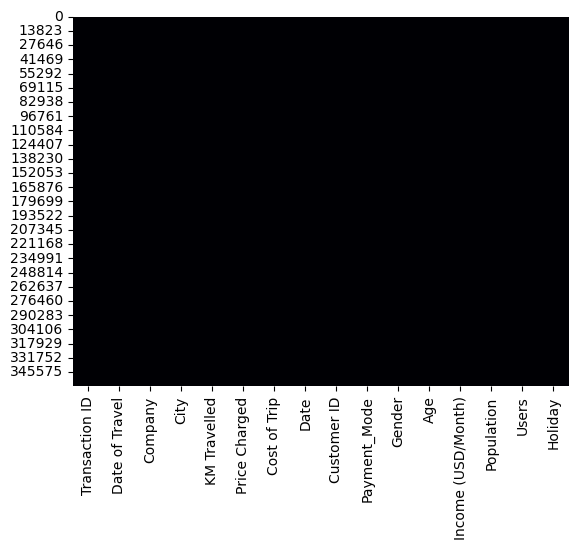

In [26]:
sns.heatmap(merged_df.isnull(),cmap = 'magma',cbar = False);

In [27]:
merged_df.describe()

Transaction ID  Date of Travel   KM Travelled  Price Charged  \
count    3.593920e+05   359392.000000  359392.000000  359392.000000   
mean     1.022076e+07    42964.067998      22.567254     423.443311   
min      1.000001e+07    42371.000000       1.900000      15.600000   
25%      1.011081e+07    42697.000000      12.000000     206.437500   
50%      1.022104e+07    42988.000000      22.440000     386.360000   
75%      1.033094e+07    43232.000000      32.960000     583.660000   
max      1.044011e+07    43465.000000      48.000000    2048.030000   
std      1.268058e+05      307.467197      12.233526     274.378911   

        Cost of Trip                           Date    Customer ID  \
count  359392.000000                         359392  359392.000000   
mean      286.190113  2017-08-17 01:37:55.042293760   19191.652115   
min        19.000000            2016-01-02 00:00:00       1.000000   
25%       151.200000            2016-11-23 00:00:00    2705.000000   
50%       282.480000            2017-09-10 00:00:00    7459.000000   
75%       413.683200            2018-05-12 00:00:00   36078.000000   
max       691.200000            2018-12-31 00:00:00   60000.000000   
std       157.993661                            NaN   21012.412463   

                 Age  Income (USD/Month)        Holiday  
count  359392.000000       359392.000000  359392.000000  
mean       35.336705        15048.822937       0.051877  
min        18.000000         2000.000000       0.000000  
25%        25.000000         8424.000000       0.000000  
50%        33.000000        14685.000000       0.000000  
75%        42.000000        21035.000000       0.000000  
max        65.000000        35000.000000       1.000000  
std        12.594234         7969.409482       0.221778

In [28]:
merged_df['Date']

0        2016-01-08
1        2016-01-06
2        2016-01-02
3        2016-01-07
4        2016-01-03
            ...    
359387   2018-01-08
359388   2018-01-04
359389   2018-01-05
359390   2018-01-05
359391   2018-01-02
Name: Date, Length: 359392, dtype: datetime64[ns]

In [29]:
master_data = merged_df.copy()

In [30]:
master_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359392 non-null  int64         
 1   Date of Travel      359392 non-null  int64         
 2   Company             359392 non-null  object        
 3   City                359392 non-null  object        
 4   KM Travelled        359392 non-null  float64       
 5   Price Charged       359392 non-null  float64       
 6   Cost of Trip        359392 non-null  float64       
 7   Date                359392 non-null  datetime64[ns]
 8   Customer ID         359392 non-null  int64         
 9   Payment_Mode        359392 non-null  object        
 10  Gender              359392 non-null  object        
 11  Age                 359392 non-null  int64         
 12  Income (USD/Month)  359392 non-null  int64         
 13  Population          359392 no

In [31]:
size_bytes = master_data.memory_usage(deep=True).sum()
size_mb = size_bytes / (1024 * 1024)

print(f"DataFrame size in memory: {size_mb:.2f} MB")


DataFrame size in memory: 144.84 MB


In [32]:
master_data.dtypes

Transaction ID                 int64
Date of Travel                 int64
Company                       object
City                          object
KM Travelled                 float64
Price Charged                float64
Cost of Trip                 float64
Date                  datetime64[ns]
Customer ID                    int64
Payment_Mode                  object
Gender                        object
Age                            int64
Income (USD/Month)             int64
Population                    object
Users                         object
Holiday                      float64
dtype: object

In [33]:
print(master_data.nunique().sort_values(ascending=False))

Transaction ID        359392
Price Charged          99176
Customer ID            46148
Income (USD/Month)     22725
Cost of Trip           16291
Date of Travel          1095
Date                    1095
KM Travelled             874
Age                       48
City                      19
Population                19
Users                     19
Company                    2
Payment_Mode               2
Gender                     2
Holiday                    2
dtype: int64


In [34]:
master_data['Company'].unique()

array(['Pink Cab', 'Yellow Cab'], dtype=object)

 #### Cleaning the data

In [35]:

for column in master_data.columns:
    if ' ' in column:
        master_data = master_data.rename(columns={column:column.replace(' ','_')})
    for column in ["Population","Users"] :
        master_data[column] = master_data[column].astype(str).str.replace(',', '')
    for column in ["Population", "Users","Holiday"] :
        master_data[column] = master_data[column].astype('int64')

master_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction_ID      359392 non-null  int64         
 1   Date_of_Travel      359392 non-null  int64         
 2   Company             359392 non-null  object        
 3   City                359392 non-null  object        
 4   KM_Travelled        359392 non-null  float64       
 5   Price_Charged       359392 non-null  float64       
 6   Cost_of_Trip        359392 non-null  float64       
 7   Date                359392 non-null  datetime64[ns]
 8   Customer_ID         359392 non-null  int64         
 9   Payment_Mode        359392 non-null  object        
 10  Gender              359392 non-null  object        
 11  Age                 359392 non-null  int64         
 12  Income_(USD/Month)  359392 non-null  int64         
 13  Population          359392 no

In [36]:
print(master_data['Price_Charged'])

0         370.95
1         358.52
2         125.20
3         377.40
4         114.62
           ...  
359387     69.24
359388    113.75
359389    437.07
359390    146.19
359391    191.58
Name: Price_Charged, Length: 359392, dtype: float64


### Extract relevant features for subsequent analysis

In [37]:
# Derive some interested features for later analysis
master_data['Year'] = master_data['Date'].dt.year
master_data['Month'] = master_data['Date'].dt.month
master_data['Profit'] = master_data['Price_Charged'] - master_data['Cost_of_Trip']
#Profit alone can be misleading if it's driven by high revenue but also high cost.
#Percentage profit rate (or Return on Cost) : How much profit was made for every unit of cost, expressed as a percentage.
master_data['Profit_Rate'] = ((master_data['Price_Charged'] - master_data['Cost_of_Trip'])/master_data['Cost_of_Trip'])*100
master_data['Profit_per_KM'] = master_data['Profit']/ master_data['KM_Travelled']
#Profit Margin on Revenue:Profit margin tells you how efficiently each cab company turns revenue into profit.
master_data['Profit_Margin'] = ((master_data['Price_Charged'] - master_data['Cost_of_Trip']) / master_data['Price_Charged']) * 100

master_data['User_Ratio'] = master_data['Users']/master_data['Population']*100

master_data.info()

master_data = master_data.drop(master_data.columns[7], axis=1)
print(master_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction_ID      359392 non-null  int64         
 1   Date_of_Travel      359392 non-null  int64         
 2   Company             359392 non-null  object        
 3   City                359392 non-null  object        
 4   KM_Travelled        359392 non-null  float64       
 5   Price_Charged       359392 non-null  float64       
 6   Cost_of_Trip        359392 non-null  float64       
 7   Date                359392 non-null  datetime64[ns]
 8   Customer_ID         359392 non-null  int64         
 9   Payment_Mode        359392 non-null  object        
 10  Gender              359392 non-null  object        
 11  Age                 359392 non-null  int64         
 12  Income_(USD/Month)  359392 non-null  int64         
 13  Population          359392 no

In [38]:
master_data['Year'].unique()

array([2016, 2017, 2018], dtype=int32)

###  3.Compare Yellow Cab and Pink Cab from Different Aspects

In this section , we compare the data of Yellow Cab and Pink Cab to answer the following questions.

3.1 What's the profit rate of Cab market? Which company has higher profit rate?

3.2 Does Yellow Cab have bigger market share than Pink Cab?

3.3 Do Customers prefer Yellow Cab to Pink Cab?

3.4 Who serves the higher income

3.5 Which company prevail in which city?

3.6 Can Yellow Cab make more profit in the future?

As some figures and tables have implications for different questions, we will analyze step-by-step and then make a summary answer at last. 

### Average Feature Comparison Between Pink Cab and Yellow Cab

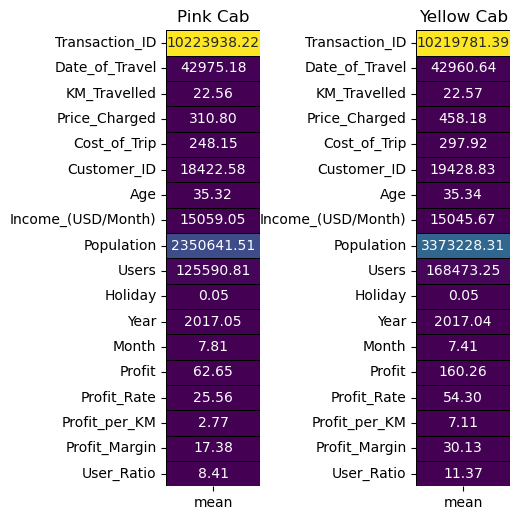

In [39]:
Pink = master_data[master_data['Company'] == 'Pink Cab'].describe().T
Yellow = master_data[master_data['Company'] == 'Yellow Cab'].describe().T
colors = ['#F93822','#FDD20E']

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,5))
plt.subplot(1,2,1)
sns.heatmap(Pink[['mean']],annot = True,cmap = 'viridis',linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f',)
plt.title('Pink Cab')

plt.subplot(1,2,2)
sns.heatmap(Yellow[['mean']],annot = True,cmap = 'viridis',linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Yellow Cab')

fig.tight_layout(pad = 0)

## 2. Exploratory Data Analysis


#### Overall: Company-wise comparison

Hypothesis 1:
*“The distribution of profit-related metrics (e.g., profit, profit rate, profit per km) significantly differs between Pink Cab and Yellow Cab.”*

Possible Investigation:

* Does one company have a higher average profit rate than the other?
* Is cost structure (Cost_of_Trip) similar across both?
* Yellow Cab serves more long-distance or high-cost trips while Pink Cab operates shorter, lower-cost routes.
---

#### Gender-wise for each company

Hypothesis 2:
*“Profit metrics vary by customer gender within each company.”*

Possible Investigation:

* Do male or female customers tend to result in higher profitability?
* Are there differences in pricing patterns by gender?

---

#### Holiday effect for Yellow and Pink

Hypothesis 3:
*“Cab profitability increases on holidays due to higher demand.”*

Possible Investigation:

* Is the cost or price higher during holidays?
* Is profit or profit per km significantly higher on holidays?

---

#### City-wise

Hypothesis 4:
*“Certain cities contribute more to profit due to either higher Price_Charged or better margins.”*

Possible Investigation:

* Are profit per km or profit rates consistent across cities?
* Which cities are the most/least profitable?

---

#### Year-wise trend

Hypothesis 5:
*“There is a seasonal or temporal trend in cab company performance, such as changing profit rates or cost structures over years.”*

Possible Investigation:

* Is there a steady increase/decrease in profit over years?
* Did Cost_of_Trips or Price_Charged fluctuate significantly?

---

#### Segmented customer behavior

Hypothesis 6 (Cross-cutting):
*“Customer segments (defined by gender, city, or holiday usage) exhibit distinct behavior in terms of trip cost, pricing, and profitability.”*

Possible Investigation:

* Are any segments more cost-efficient for the company?
* Is there a correlation between gender, location, and profit margin?

---


<Axes: xlabel='KM_Travelled', ylabel='Count'>

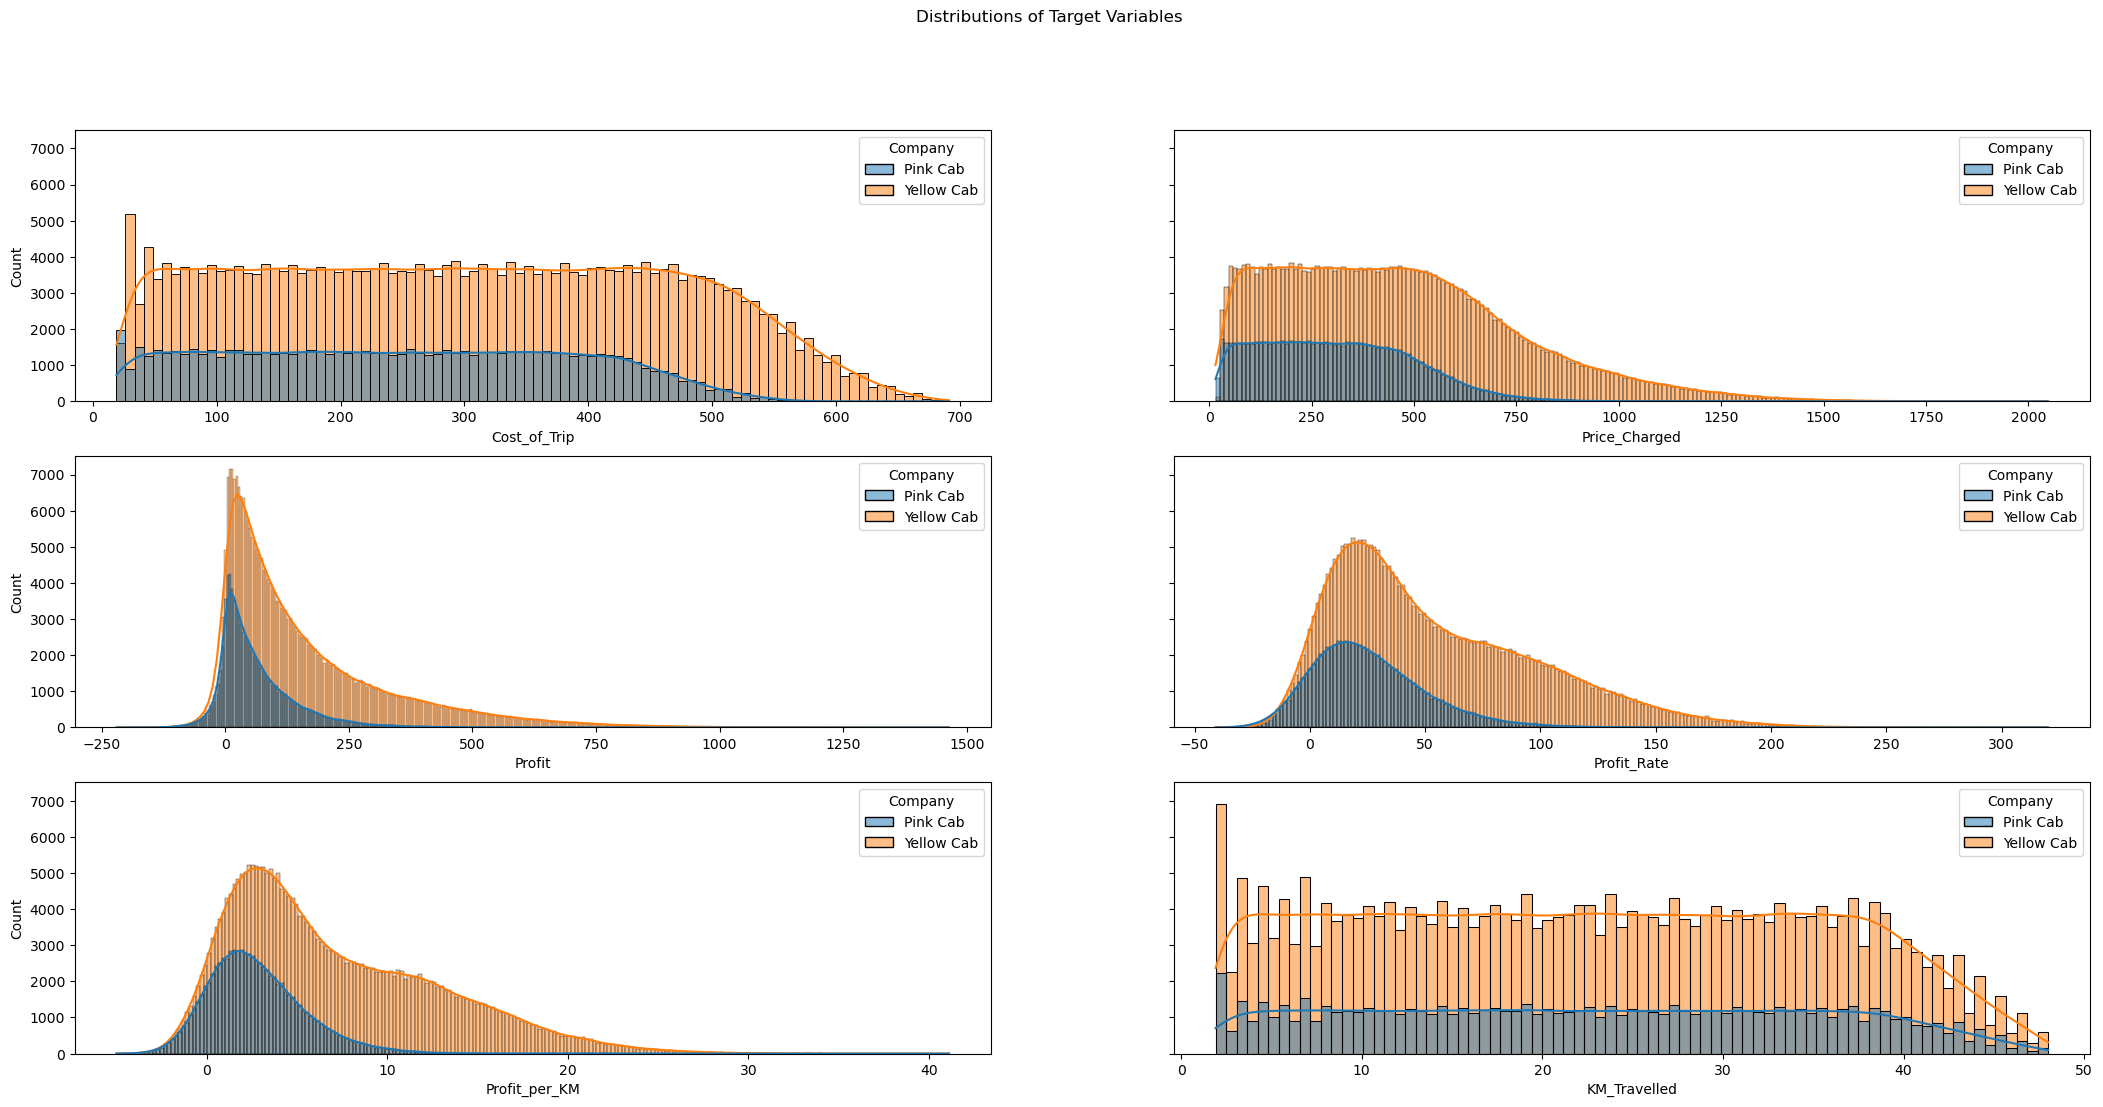

In [40]:
fig,axes = plt.subplots(3, 2 , figsize=(26,12), sharey=True)
fig.suptitle('Distributions of Target Variables')

sns.histplot(ax=axes[0,0], data=master_data , x='Cost_of_Trip' ,kde =True, hue="Company")
sns.histplot(ax=axes[0,1], data=master_data , x='Price_Charged' , kde = True , hue="Company")
sns.histplot(ax=axes[1,0], data=master_data , x='Profit' , kde = True , hue="Company") 
sns.histplot(ax=axes[1,1], data=master_data , x ='Profit_Rate' , kde = True , hue="Company")
sns.histplot(ax=axes[2,0], data=master_data , x='Profit_per_KM' , kde = True , hue="Company")
sns.histplot(ax=axes[2,1], data=master_data , x='KM_Travelled' , kde = True , hue="Company")


In [41]:
mask1 = (master_data["Company"] == 'Pink Cab')
Pink_cab_df = master_data[mask1]

mask2 = (master_data["Company"] == 'Yellow Cab')
Yellow_cab_df = master_data[mask2]

<Axes: xlabel='Profit_Margin', ylabel='Count'>

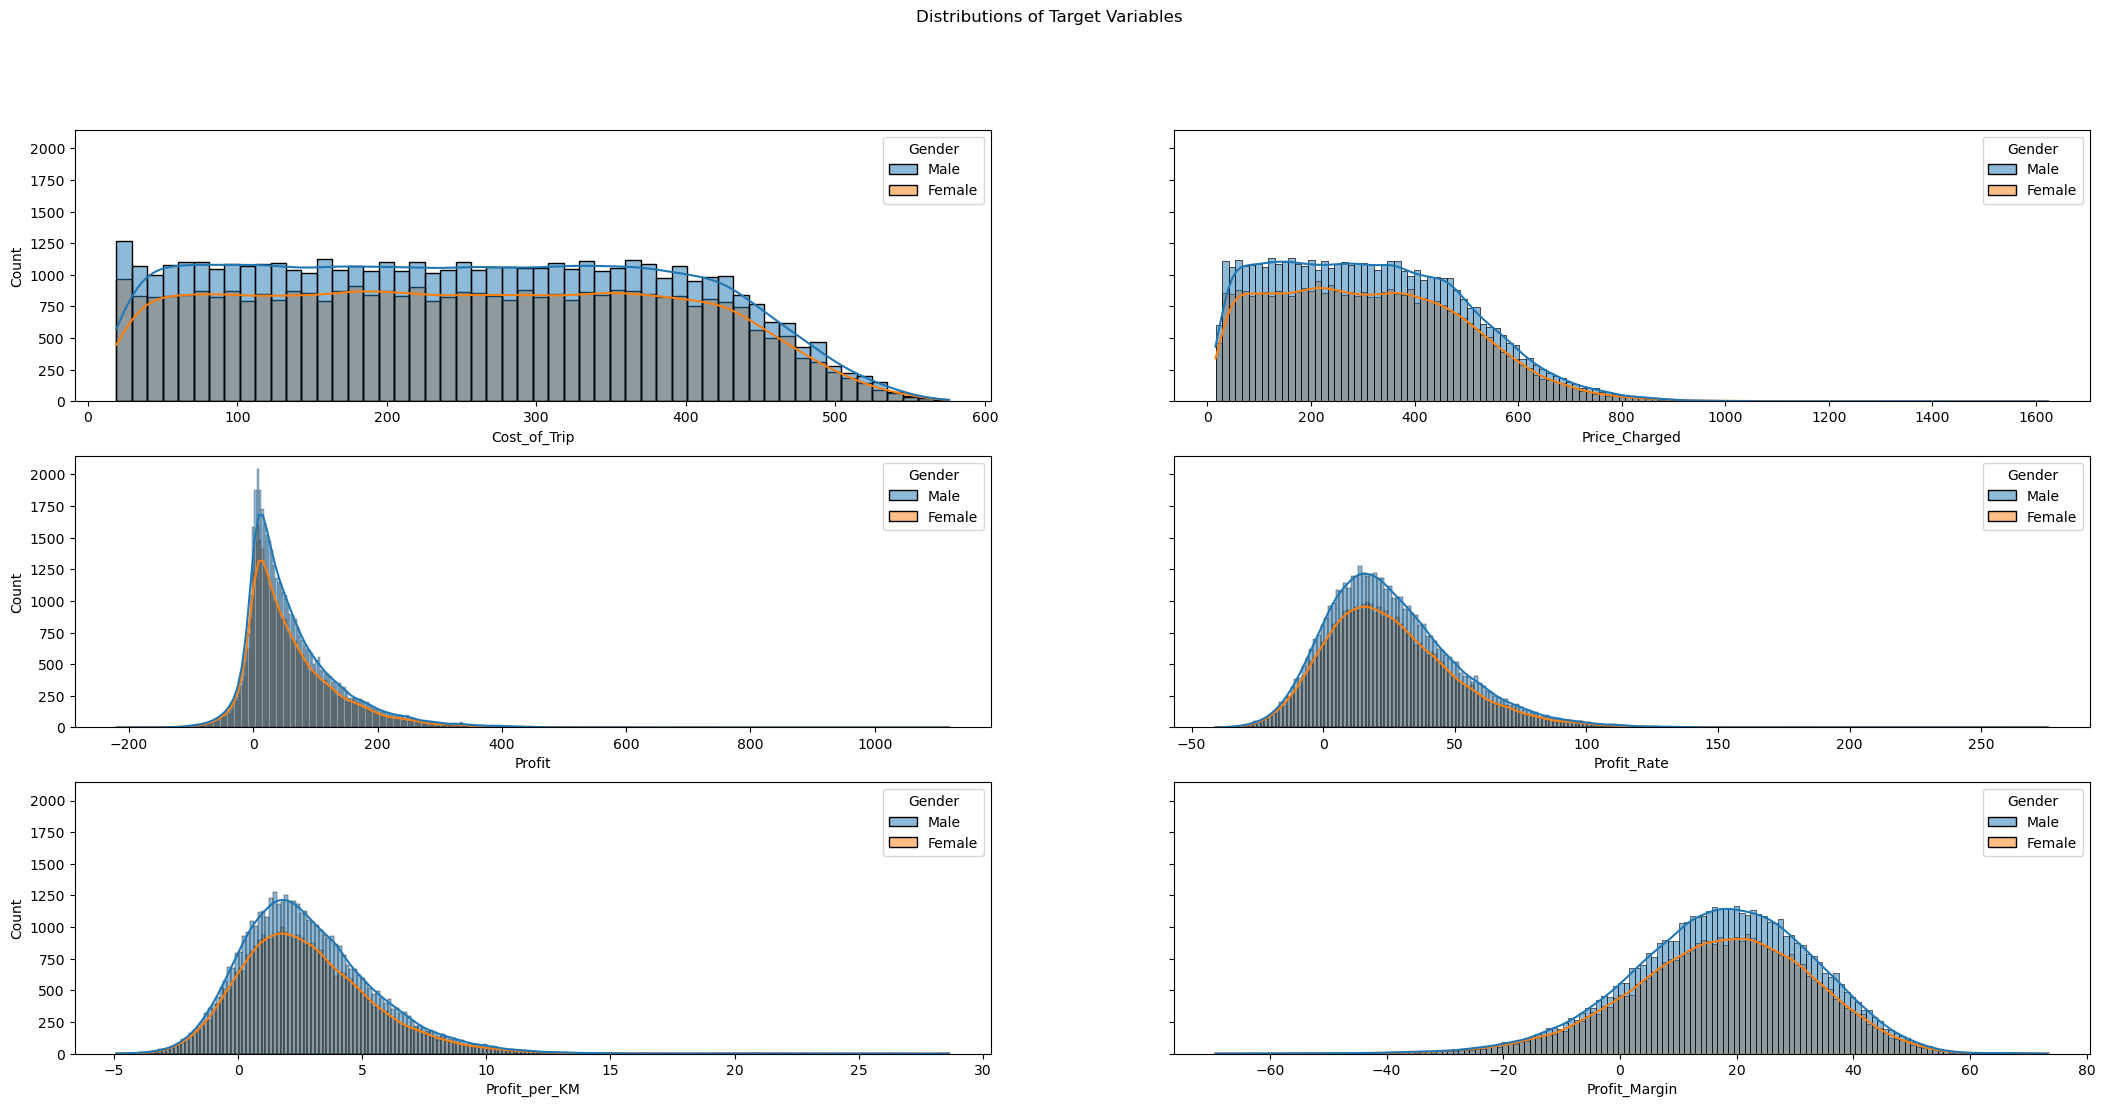

In [99]:
fig,axes = plt.subplots(3, 2 , figsize=(26,12), sharey=True)
fig.suptitle('Distributions of Target Variables')

sns.histplot(ax=axes[0,0], data=Pink_cab_df , x='Cost_of_Trip' ,kde =True, hue="Gender")
sns.histplot(ax=axes[0,1], data=Pink_cab_df , x='Price_Charged' , kde = True , hue="Gender")
sns.histplot(ax=axes[1,0], data=Pink_cab_df , x='Profit' , kde = True , hue="Gender") 
sns.histplot(ax=axes[1,1], data=Pink_cab_df , x='Profit_Rate' , kde = True , hue="Gender")
sns.histplot(ax=axes[2,0], data=Pink_cab_df , x='Profit_per_KM' , kde = True , hue="Gender")
sns.histplot(ax=axes[2,1], data=Pink_cab_df , x ='Profit_Margin' , kde = True , hue="Gender")


<Axes: xlabel='Profit_Margin', ylabel='Count'>

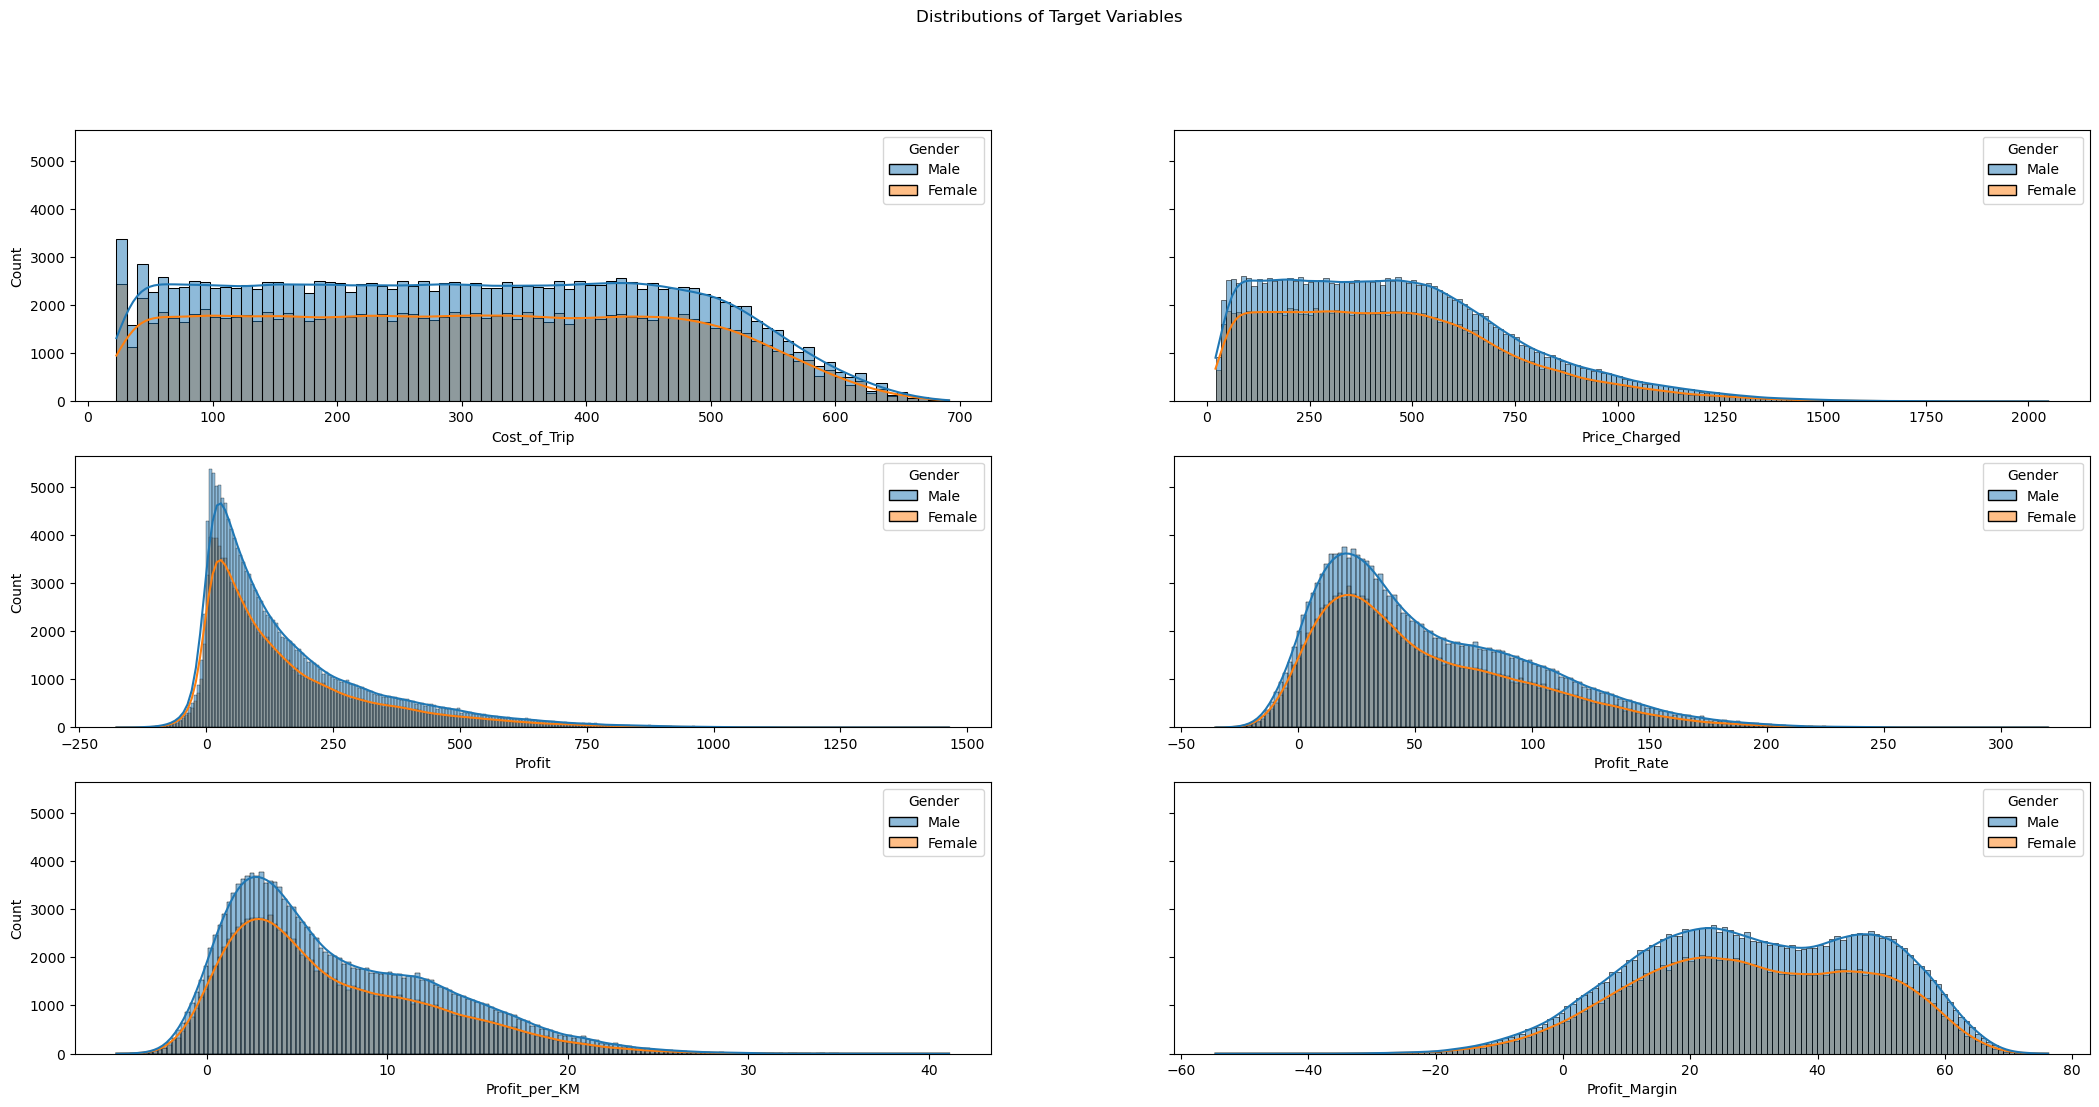

In [100]:
fig,axes = plt.subplots(3, 2 , figsize=(26,12), sharey=True)
fig.suptitle('Distributions of Target Variables')

sns.histplot(ax=axes[0,0], data=Yellow_cab_df , x='Cost_of_Trip' ,kde =True, hue="Gender")
sns.histplot(ax=axes[0,1], data=Yellow_cab_df , x='Price_Charged' , kde = True , hue="Gender")
sns.histplot(ax=axes[1,0], data=Yellow_cab_df , x='Profit' , kde = True , hue="Gender") 
sns.histplot(ax=axes[1,1], data=Yellow_cab_df , x='Profit_Rate' , kde = True , hue="Gender")
sns.histplot(ax=axes[2,0], data=Yellow_cab_df , x='Profit_per_KM' , kde = True , hue="Gender")
sns.histplot(ax=axes[2,1], data=Yellow_cab_df , x ='Profit_Margin' , kde = True , hue="Gender")


<Axes: xlabel='Profit_Margin', ylabel='Count'>

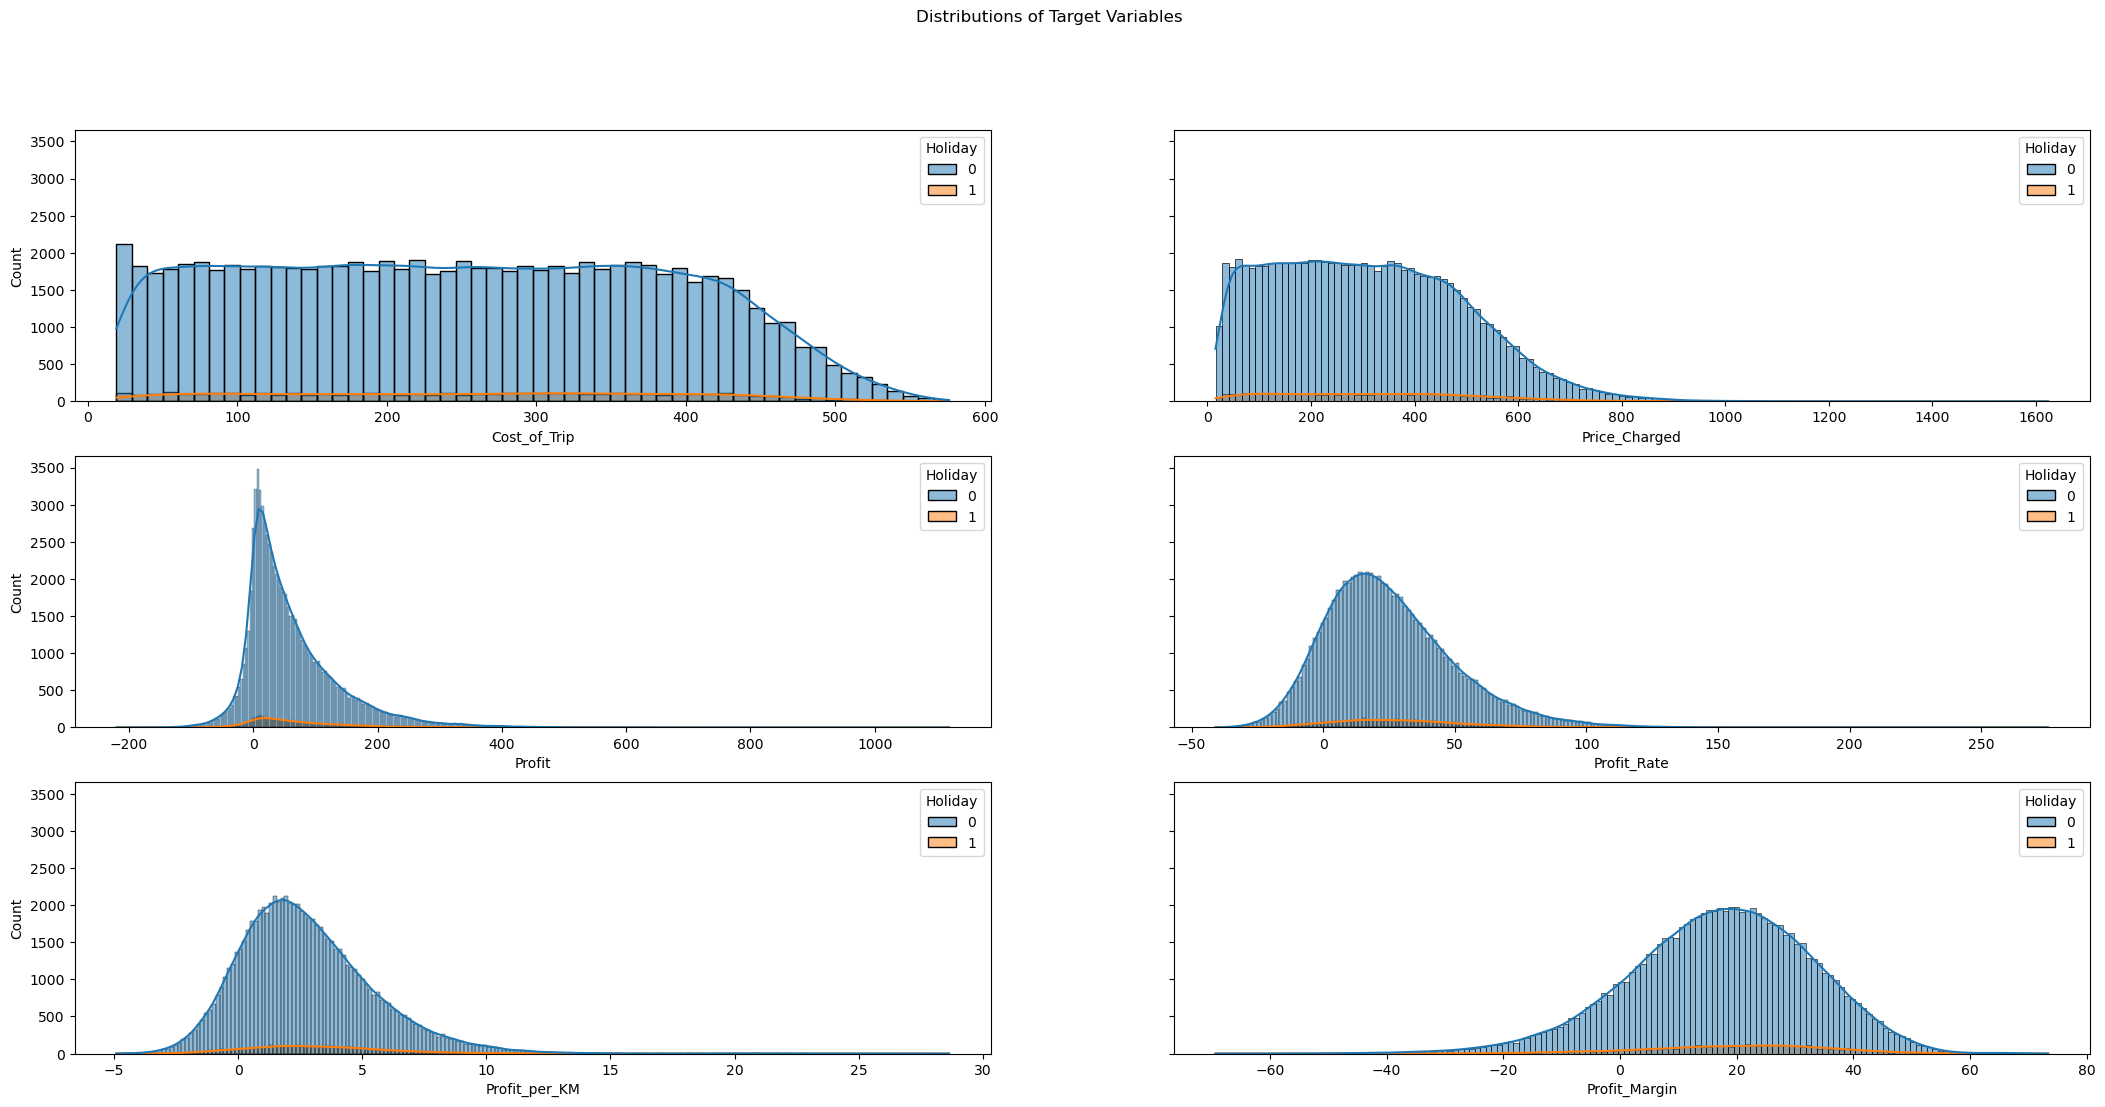

In [101]:
fig,axes = plt.subplots(3, 2 , figsize=(26,12), sharey=True)
fig.suptitle('Distributions of Target Variables')

sns.histplot(ax=axes[0,0], data=Pink_cab_df , x='Cost_of_Trip' ,kde =True, hue="Holiday")
sns.histplot(ax=axes[0,1], data=Pink_cab_df , x='Price_Charged' , kde = True , hue="Holiday")
sns.histplot(ax=axes[1,0], data=Pink_cab_df , x='Profit' , kde = True , hue="Holiday") 
sns.histplot(ax=axes[1,1], data=Pink_cab_df , x='Profit_Rate' , kde = True , hue="Holiday")
sns.histplot(ax=axes[2,0], data=Pink_cab_df , x='Profit_per_KM' , kde = True , hue="Holiday")
sns.histplot(ax=axes[2,1], data=Pink_cab_df , x ='Profit_Margin' , kde = True , hue="Holiday")


<Axes: xlabel='Profit_Margin', ylabel='Count'>

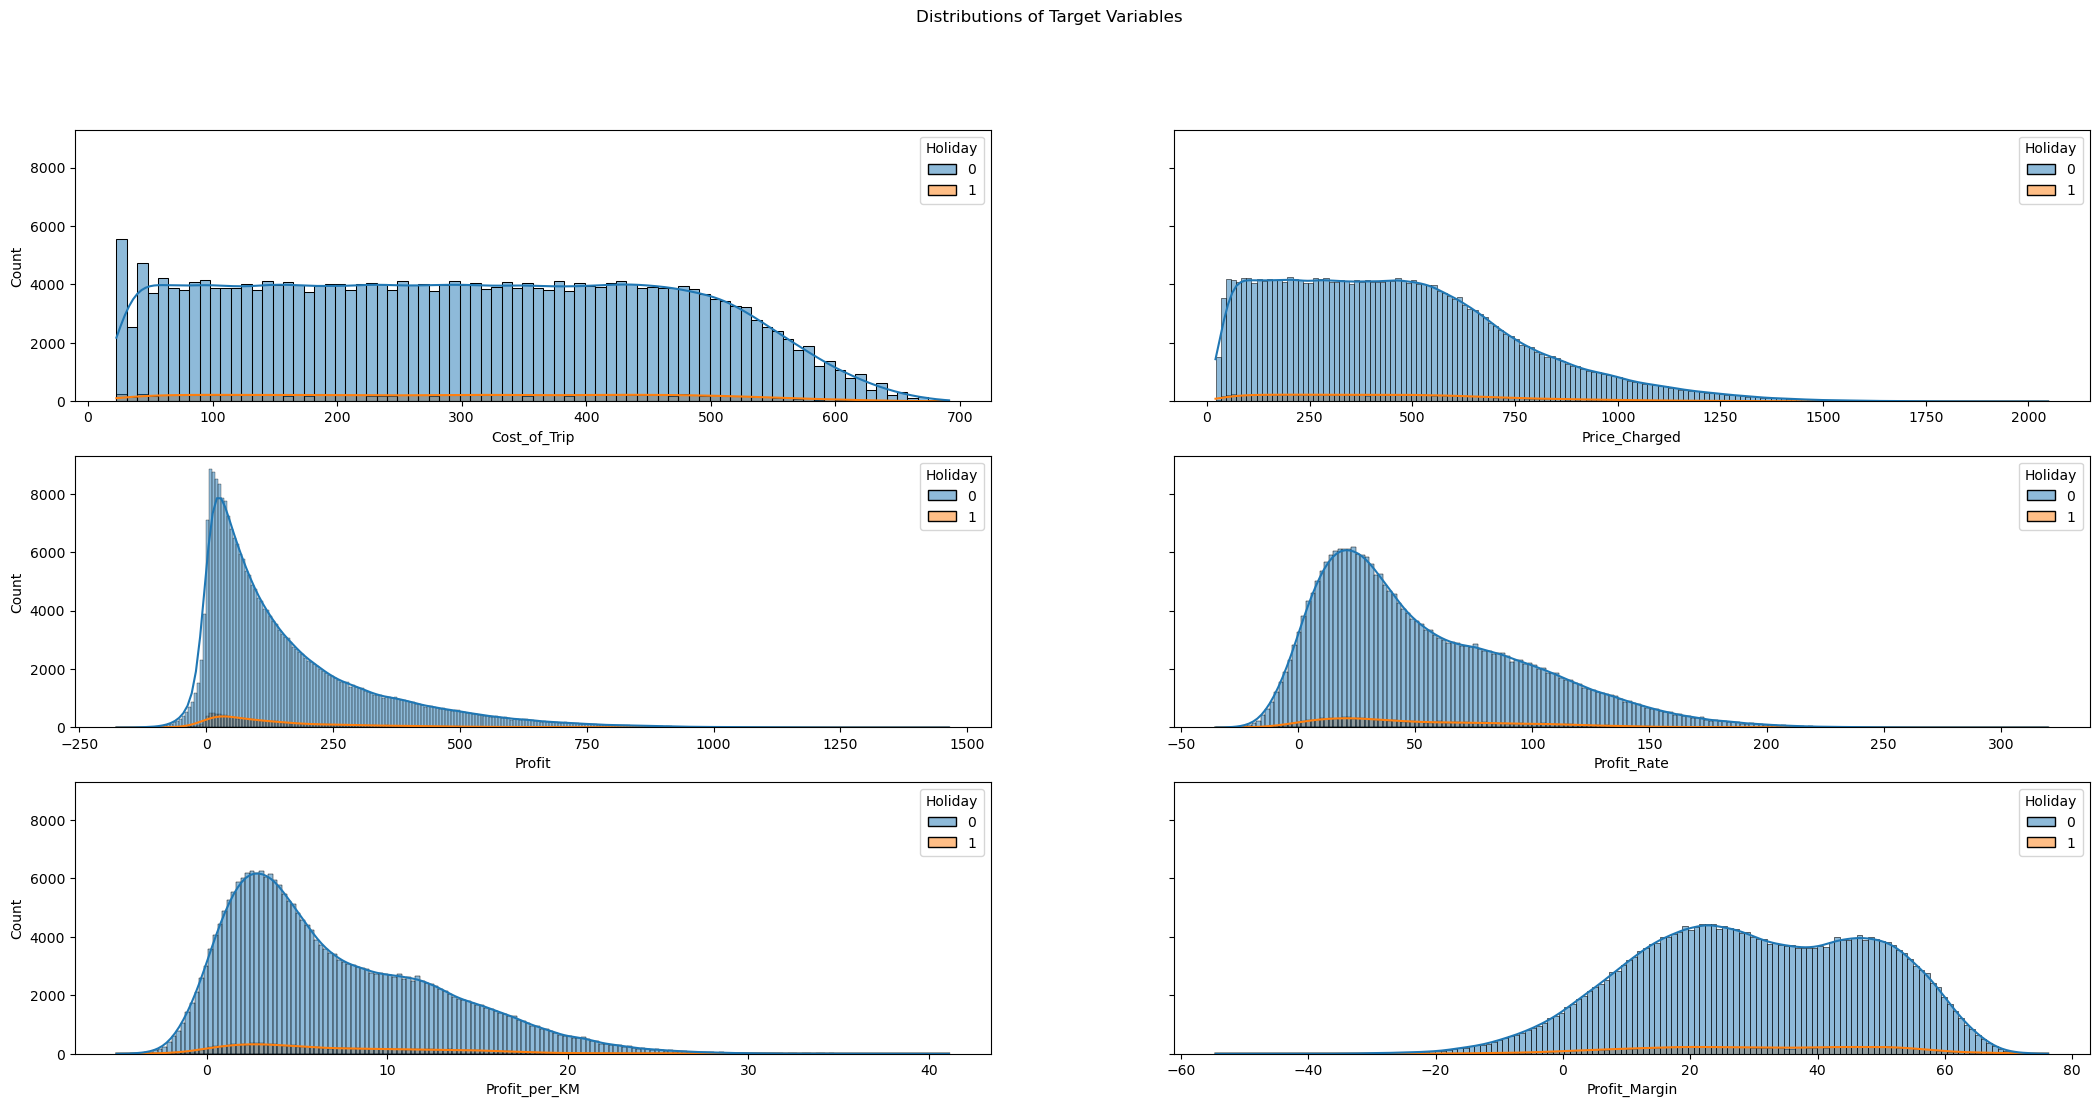

In [102]:
fig,axes = plt.subplots(3, 2 , figsize=(26,12), sharey=True)
fig.suptitle('Distributions of Target Variables')

sns.histplot(ax=axes[0,0], data=Yellow_cab_df , x='Cost_of_Trip' ,kde =True, hue="Holiday")
sns.histplot(ax=axes[0,1], data=Yellow_cab_df , x='Price_Charged' , kde = True , hue="Holiday")
sns.histplot(ax=axes[1,0], data=Yellow_cab_df , x='Profit' , kde = True , hue="Holiday") 
sns.histplot(ax=axes[1,1], data=Yellow_cab_df , x='Profit_Rate' , kde = True , hue="Holiday")
sns.histplot(ax=axes[2,0], data=Yellow_cab_df , x='Profit_per_KM' , kde = True , hue="Holiday")
sns.histplot(ax=axes[2,1], data=Yellow_cab_df , x ='Profit_Margin' , kde = True , hue="Holiday")


<Axes: xlabel='Profit_Margin', ylabel='Count'>

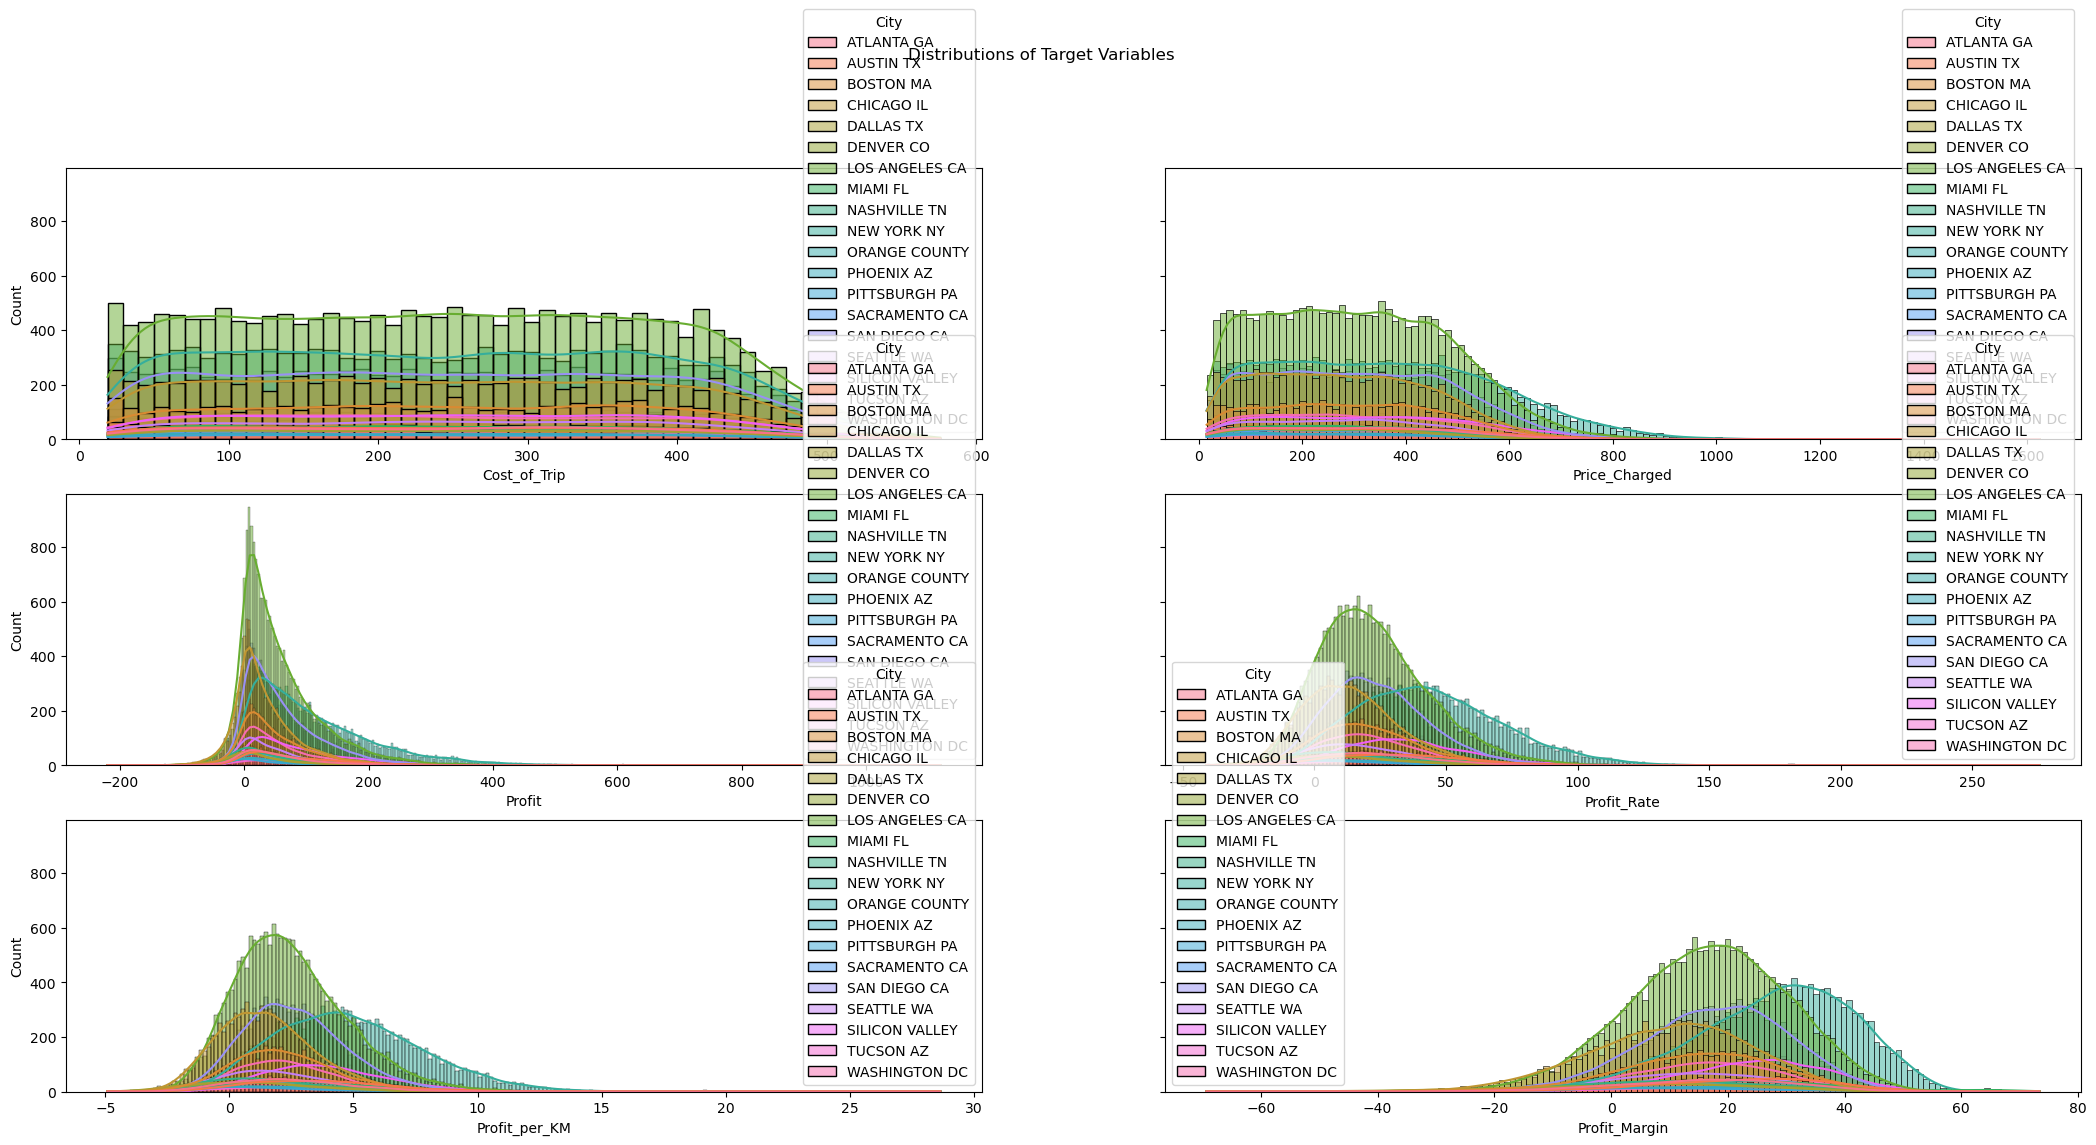

In [103]:
fig,axes = plt.subplots(3, 2 , figsize=(26,12), sharey=True)
fig.suptitle('Distributions of Target Variables')

sns.histplot(ax=axes[0,0], data=Pink_cab_df , x='Cost_of_Trip' ,kde =True, hue="City")
sns.histplot(ax=axes[0,1], data=Pink_cab_df , x='Price_Charged' , kde = True , hue="City")
sns.histplot(ax=axes[1,0], data=Pink_cab_df , x='Profit' , kde = True , hue="City") 
sns.histplot(ax=axes[1,1], data=Pink_cab_df , x='Profit_Rate' , kde = True , hue="City")
sns.histplot(ax=axes[2,0], data=Pink_cab_df , x='Profit_per_KM' , kde = True , hue="City")
sns.histplot(ax=axes[2,1], data=Pink_cab_df , x ='Profit_Margin' , kde = True , hue="City")


<Axes: xlabel='Profit_Margin', ylabel='Count'>

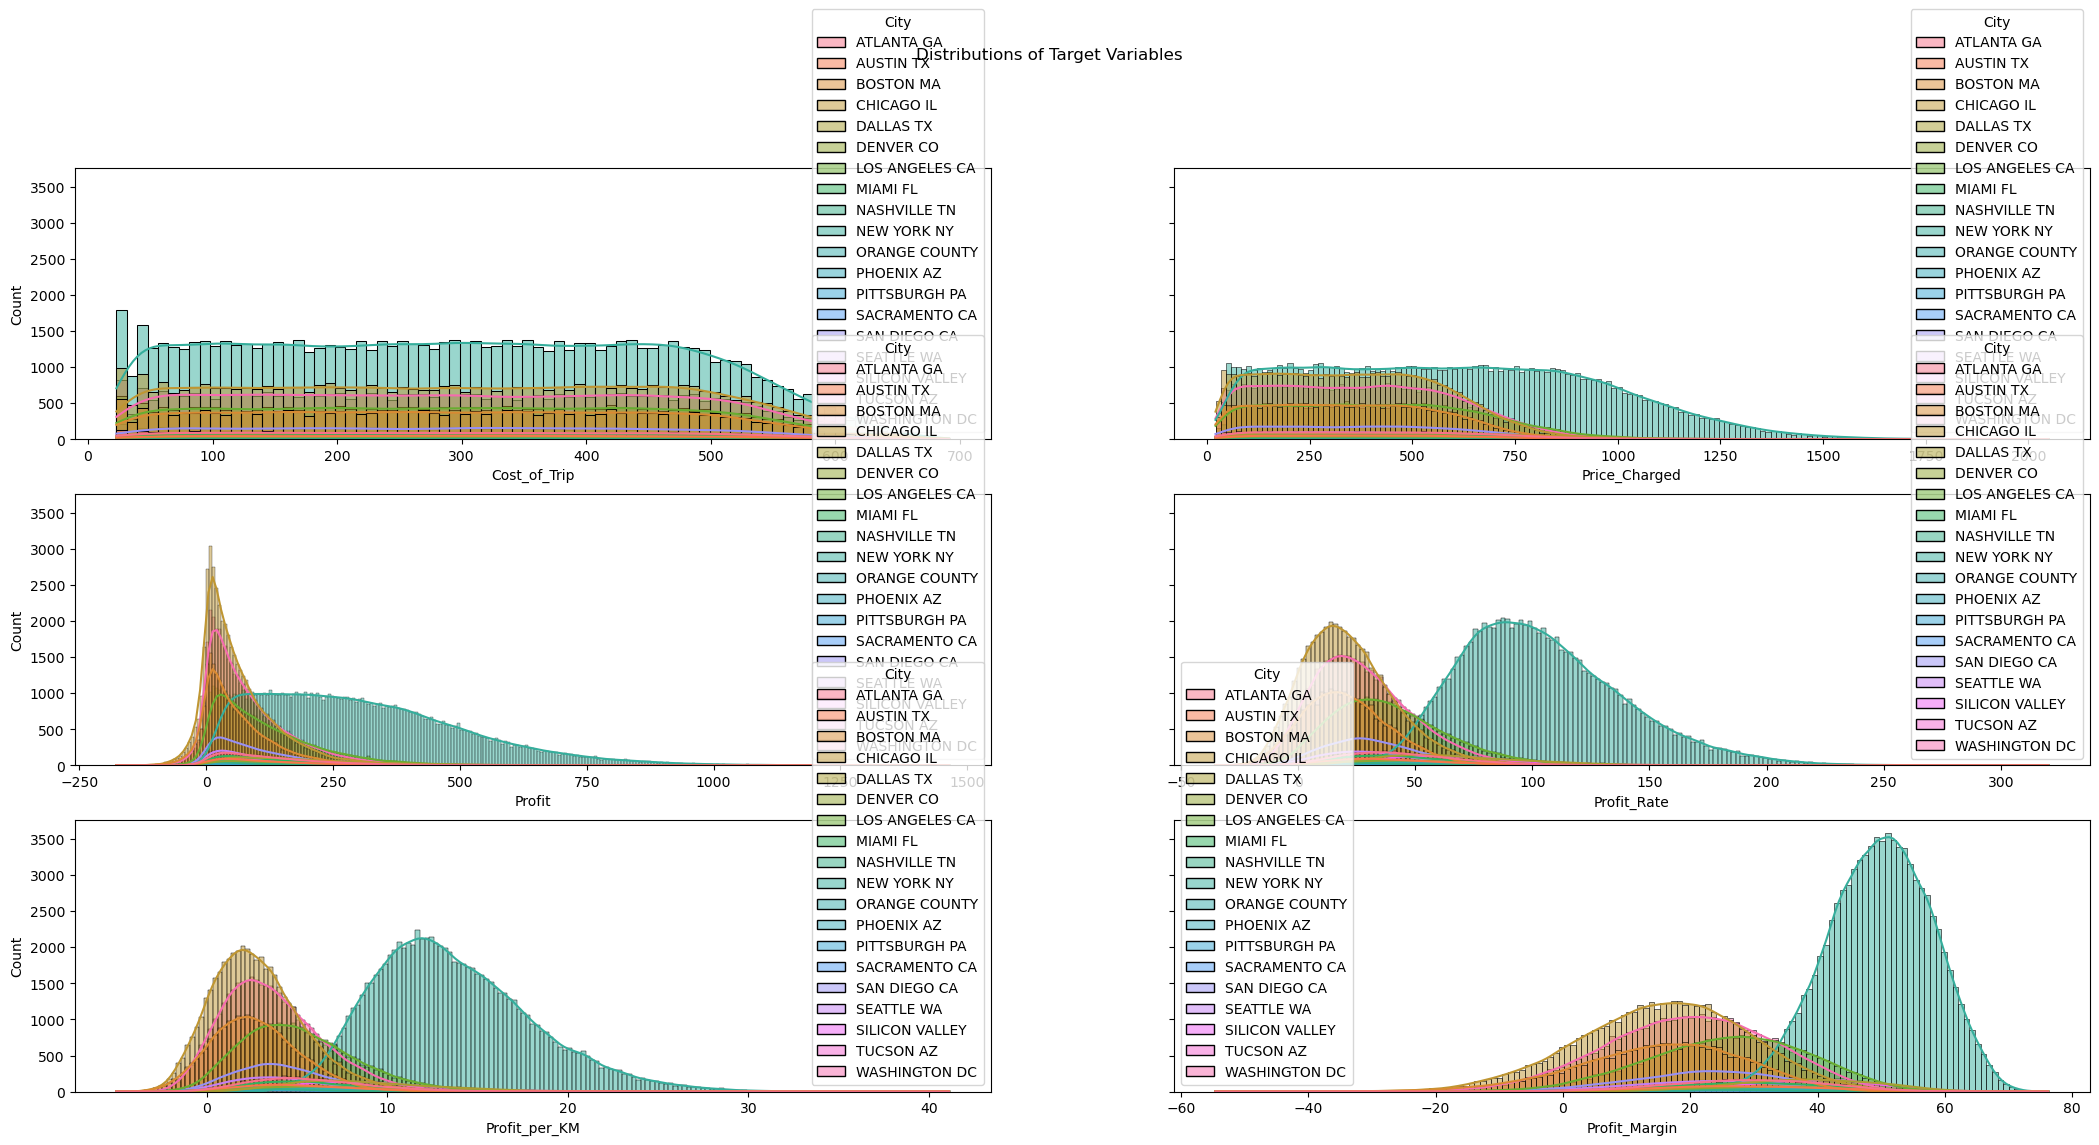

In [104]:
fig,axes = plt.subplots(3, 2 , figsize=(26,12), sharey=True)
fig.suptitle('Distributions of Target Variables')

sns.histplot(ax=axes[0,0], data=Yellow_cab_df , x='Cost_of_Trip' ,kde =True, hue="City")
sns.histplot(ax=axes[0,1], data=Yellow_cab_df , x='Price_Charged' , kde = True , hue="City")
sns.histplot(ax=axes[1,0], data=Yellow_cab_df , x='Profit' , kde = True , hue="City") 
sns.histplot(ax=axes[1,1], data=Yellow_cab_df , x='Profit_Rate' , kde = True , hue="City")
sns.histplot(ax=axes[2,0], data=Yellow_cab_df , x='Profit_per_KM' , kde = True , hue="City")
sns.histplot(ax=axes[2,1], data=Yellow_cab_df , x ='Profit_Margin' , kde = True , hue="City")


<Axes: xlabel='Profit_Margin', ylabel='Count'>

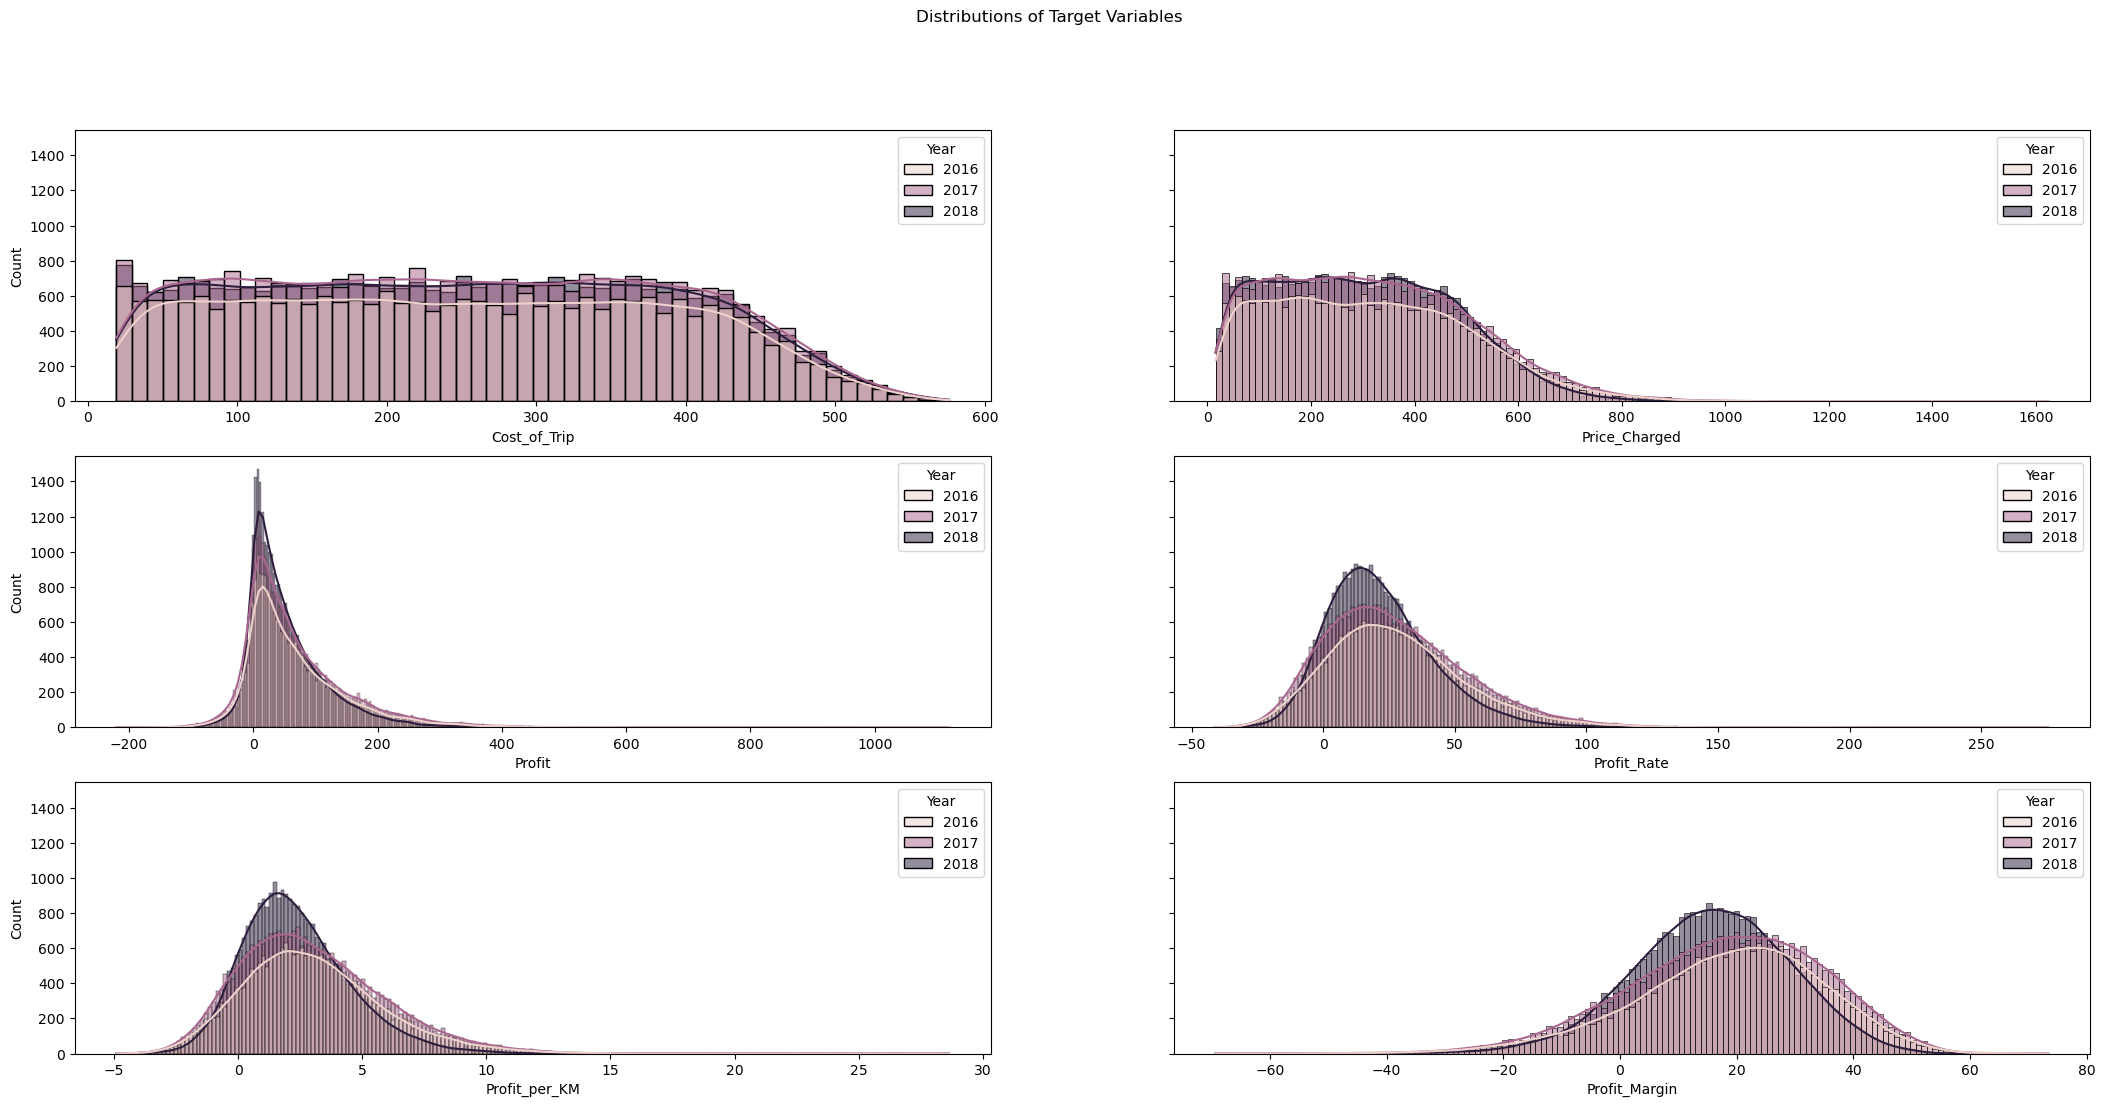

In [105]:
fig,axes = plt.subplots(3, 2 , figsize=(26,12), sharey=True)
fig.suptitle('Distributions of Target Variables')

sns.histplot(ax=axes[0,0], data=Pink_cab_df , x='Cost_of_Trip' ,kde =True, hue="Year")
sns.histplot(ax=axes[0,1], data=Pink_cab_df, x='Price_Charged' , kde = True , hue="Year")
sns.histplot(ax=axes[1,0], data=Pink_cab_df , x='Profit' , kde = True , hue="Year") 
sns.histplot(ax=axes[1,1], data=Pink_cab_df , x='Profit_Rate' , kde = True , hue="Year")
sns.histplot(ax=axes[2,0], data=Pink_cab_df , x='Profit_per_KM' , kde = True , hue="Year")
sns.histplot(ax=axes[2,1], data=Pink_cab_df , x ='Profit_Margin' , kde = True , hue="Year")


<Axes: xlabel='Profit_Margin', ylabel='Count'>

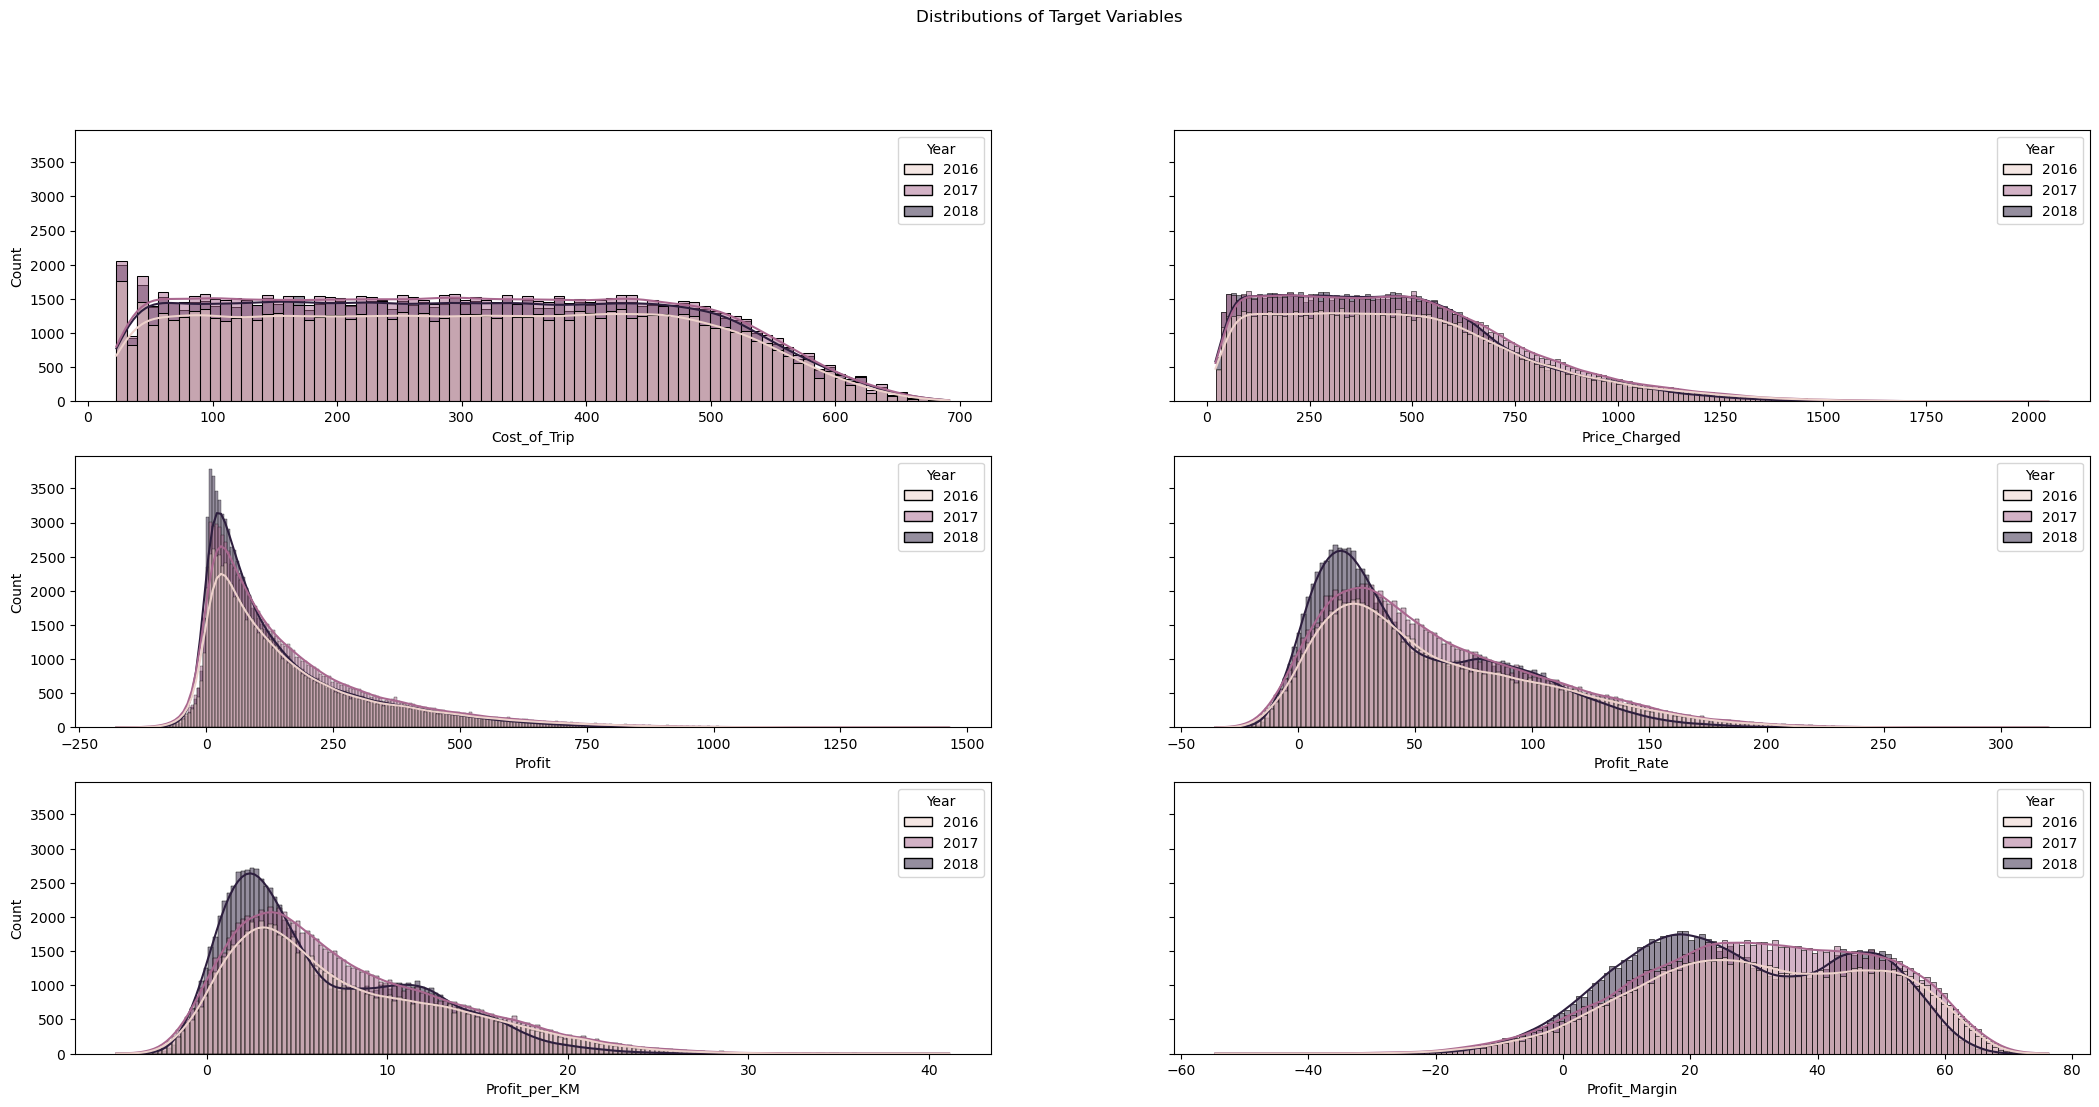

In [106]:
fig,axes = plt.subplots(3, 2 , figsize=(26,12), sharey=True)
fig.suptitle('Distributions of Target Variables')

sns.histplot(ax=axes[0,0], data=Yellow_cab_df , x='Cost_of_Trip' ,kde =True, hue="Year")
sns.histplot(ax=axes[0,1], data=Yellow_cab_df, x='Price_Charged' , kde = True , hue="Year")
sns.histplot(ax=axes[1,0], data=Yellow_cab_df , x='Profit' , kde = True , hue="Year") 
sns.histplot(ax=axes[1,1], data=Yellow_cab_df , x='Profit_Rate' , kde = True , hue="Year")
sns.histplot(ax=axes[2,0], data=Yellow_cab_df , x='Profit_per_KM' , kde = True , hue="Year")
sns.histplot(ax=axes[2,1], data=Yellow_cab_df , x ='Profit_Margin' , kde = True , hue="Year")


<Axes: xlabel='Profit_Margin', ylabel='Count'>

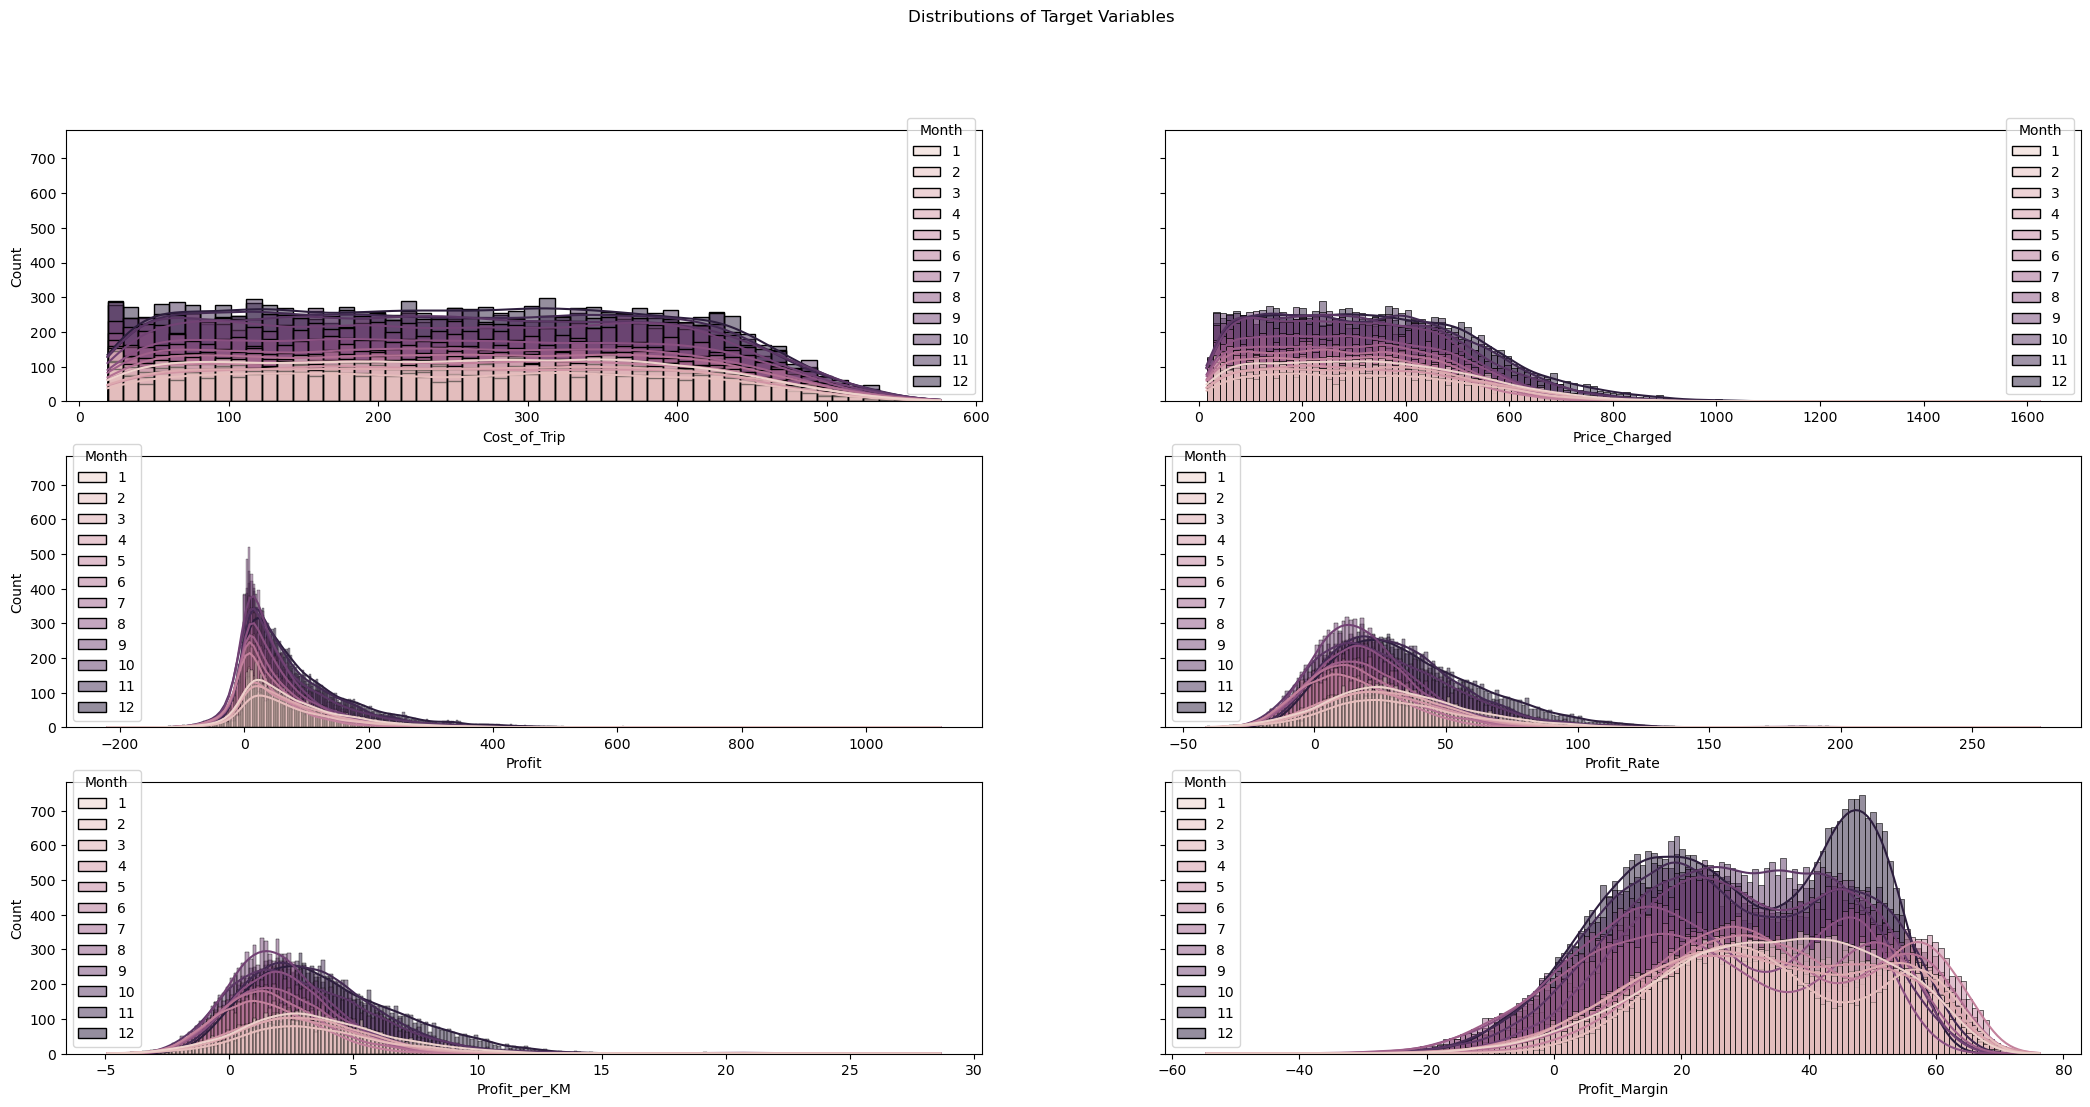

In [107]:
fig,axes = plt.subplots(3, 2 , figsize=(26,12), sharey=True)
fig.suptitle('Distributions of Target Variables')

sns.histplot(ax=axes[0,0], data=Pink_cab_df, x='Cost_of_Trip' ,kde =True, hue="Month")
sns.histplot(ax=axes[0,1], data=Pink_cab_df, x='Price_Charged' , kde = True , hue="Month")
sns.histplot(ax=axes[1,0], data=Pink_cab_df , x='Profit' , kde = True , hue="Month") 
sns.histplot(ax=axes[1,1], data=Pink_cab_df , x='Profit_Rate' , kde = True , hue="Month")
sns.histplot(ax=axes[2,0], data=Pink_cab_df , x='Profit_per_KM' , kde = True , hue="Month")
sns.histplot(ax=axes[2,1], data=Yellow_cab_df , x ='Profit_Margin' , kde = True , hue="Month")


<Axes: xlabel='Profit_Margin', ylabel='Count'>

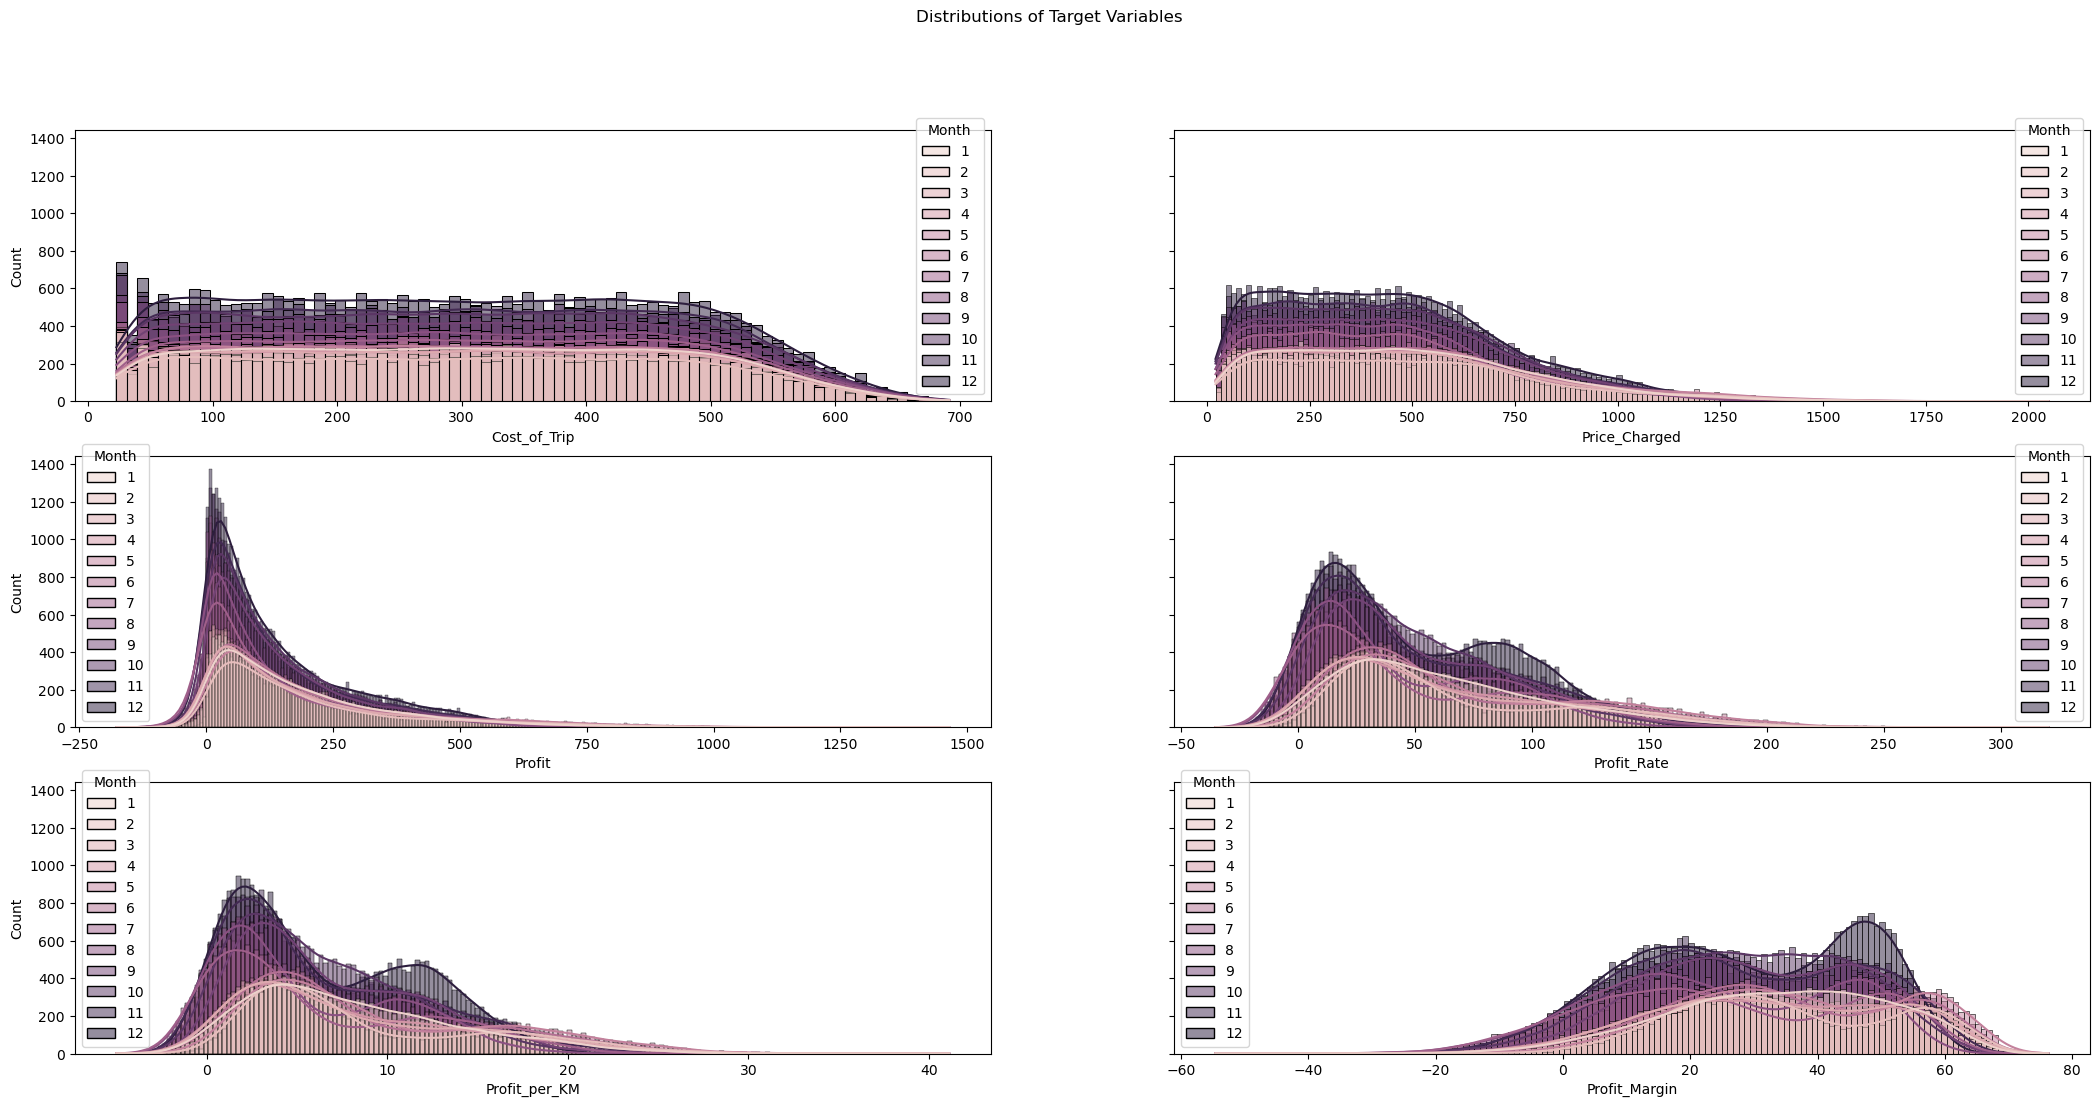

In [108]:
fig,axes = plt.subplots(3, 2 , figsize=(26,12), sharey=True)
fig.suptitle('Distributions of Target Variables')

sns.histplot(ax=axes[0,0], data=Yellow_cab_df, x='Cost_of_Trip' ,kde =True, hue="Month")
sns.histplot(ax=axes[0,1], data=Yellow_cab_df, x='Price_Charged' , kde = True , hue="Month")
sns.histplot(ax=axes[1,0], data=Yellow_cab_df , x='Profit' , kde = True , hue="Month") 
sns.histplot(ax=axes[1,1], data=Yellow_cab_df , x='Profit_Rate' , kde = True , hue="Month")
sns.histplot(ax=axes[2,0], data=Yellow_cab_df , x='Profit_per_KM' , kde = True , hue="Month")
sns.histplot(ax=axes[2,1], data=Yellow_cab_df , x ='Profit_Margin' , kde = True , hue="Month")


Selects all columns in the DataFrame that are of type 'object' — usually string columns.

These are typically the columns that contain categorical text data.

Fits the LabelEncoder to the column's unique string values.

Transforms them into integer codes.

Overwrites the column with these new encoded values.

In [52]:
col = list(master_data.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(master_data[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)


Categorical Features : Company Payment_Mode Gender Holiday Year
Numerical Features : Transaction_ID Date_of_Travel City KM_Travelled Price_Charged Cost_of_Trip Customer_ID Age Income_(USD/Month) Population Users Month Profit Profit_Rate Profit_per_KM Profit_Margin User_Ratio


In [53]:
data_encoded = master_data.copy(deep=True)
data_encoded['Population']

0         814885
1         814885
2         814885
3         814885
4         814885
           ...  
359387    418859
359388    418859
359389    418859
359390    418859
359391    418859
Name: Population, Length: 359392, dtype: int64


It only applies one-hot encoding to columns with object data type,
✅ Other columns like numeric (int, float) or datetime will stay as they are.

This is the clean and standard way to selectively one-hot encode only object (categorical) columns in pandas.

In [54]:
le = LabelEncoder()
data_encoded['Gender'] = le.fit_transform(data_encoded['Gender'])
data_encoded['City'] = le.fit_transform(data_encoded['City'])
data_encoded['Payment_Mode'] = le.fit_transform(data_encoded['Payment_Mode'])
data_encoded['Company'] = le.fit_transform(data_encoded['Company'])
#Pink_cab = data_encoded[data_encoded['Company'] == 'Pink Cab'] 
#Yellow_cab = data_encoded[data_encoded['Company'] == 'Yellow Cab']

data_encoded

Transaction_ID  Date_of_Travel  Company  City  KM_Travelled  \
0             10000011           42377        0     0         30.45   
1             10000012           42375        0     0         28.62   
2             10000013           42371        0     0          9.04   
3             10000014           42376        0     0         33.17   
4             10000015           42372        0     0          8.73   
...                ...             ...      ...   ...           ...   
359387        10440101           43108        1    18          4.80   
359388        10440104           43104        1    18          8.40   
359389        10440105           43105        1    18         27.75   
359390        10440106           43105        1    18          8.80   
359391        10440107           43102        1    18         12.76   

        Price_Charged  Cost_of_Trip  Customer_ID  Payment_Mode  Gender  ...  \
0              370.95      313.6350        29290             0       1  ...   
1              358.52      334.8540        27703             0       1  ...   
2              125.20       97.6320        28712             1       1  ...   
3              377.40      351.6020        28020             1       1  ...   
4              114.62       97.7760        27182             0       1  ...   
...               ...           ...          ...           ...     ...  ...   
359387          69.24       63.3600        52392             1       1  ...   
359388         113.75      106.8480        53286             1       1  ...   
359389         437.07      349.6500        52265             1       1  ...   
359390         146.19      114.0480        52175             0       1  ...   
359391         191.58      177.6192        52917             0       1  ...   

        Population   Users  Holiday  Year  Month   Profit  Profit_Rate  \
0           814885   24701        0  2016      1  57.3150    18.274427   
1           814885   24701        0  2016      1  23.6660     7.067558   
2           814885   24701        0  2016      1  27.5680    28.236644   
3           814885   24701        0  2016      1  25.7980     7.337273   
4           814885   24701        0  2016      1  16.8440    17.227131   
...            ...     ...      ...   ...    ...      ...          ...   
359387      418859  127001        0  2018      1   5.8800     9.280303   
359388      418859  127001        0  2018      1   6.9020     6.459644   
359389      418859  127001        0  2018      1  87.4200    25.002145   
359390      418859  127001        0  2018      1  32.1420    28.182870   
359391      418859  127001        0  2018      1  13.9608     7.859961   

        Profit_per_KM  Profit_Margin  User_Ratio  
0            1.882266      15.450869    3.031225  
1            0.826904       6.601026    3.031225  
2            3.049558      22.019169    3.031225  
3            0.777751       6.835718    3.031225  
4            1.929439      14.695516    3.031225  
...               ...            ...         ...  
359387       1.225000       8.492201   30.320705  
359388       0.821667       6.067692   30.320705  
359389       3.150270      20.001373   30.320705  
359390       3.652500      21.986456   30.320705  
359391       1.094107       7.287191   30.320705  

[359392 rows x 22 columns]

In [55]:
data_encoded.head()


Transaction_ID  Date_of_Travel  Company  City  KM_Travelled  Price_Charged  \
0        10000011           42377        0     0         30.45         370.95   
1        10000012           42375        0     0         28.62         358.52   
2        10000013           42371        0     0          9.04         125.20   
3        10000014           42376        0     0         33.17         377.40   
4        10000015           42372        0     0          8.73         114.62   

   Cost_of_Trip  Customer_ID  Payment_Mode  Gender  ...  Population  Users  \
0       313.635        29290             0       1  ...      814885  24701   
1       334.854        27703             0       1  ...      814885  24701   
2        97.632        28712             1       1  ...      814885  24701   
3       351.602        28020             1       1  ...      814885  24701   
4        97.776        27182             0       1  ...      814885  24701   

   Holiday  Year  Month  Profit  Profit_Rate  Profit_per_KM  Profit_Margin  \
0        0  2016      1  57.315    18.274427       1.882266      15.450869   
1        0  2016      1  23.666     7.067558       0.826904       6.601026   
2        0  2016      1  27.568    28.236644       3.049558      22.019169   
3        0  2016      1  25.798     7.337273       0.777751       6.835718   
4        0  2016      1  16.844    17.227131       1.929439      14.695516   

   User_Ratio  
0    3.031225  
1    3.031225  
2    3.031225  
3    3.031225  
4    3.031225  

[5 rows x 22 columns]

In [56]:
data_encoded.columns

Index(['Transaction_ID', 'Date_of_Travel', 'Company', 'City', 'KM_Travelled',
       'Price_Charged', 'Cost_of_Trip', 'Customer_ID', 'Payment_Mode',
       'Gender', 'Age', 'Income_(USD/Month)', 'Population', 'Users', 'Holiday',
       'Year', 'Month', 'Profit', 'Profit_Rate', 'Profit_per_KM',
       'Profit_Margin', 'User_Ratio'],
      dtype='object')

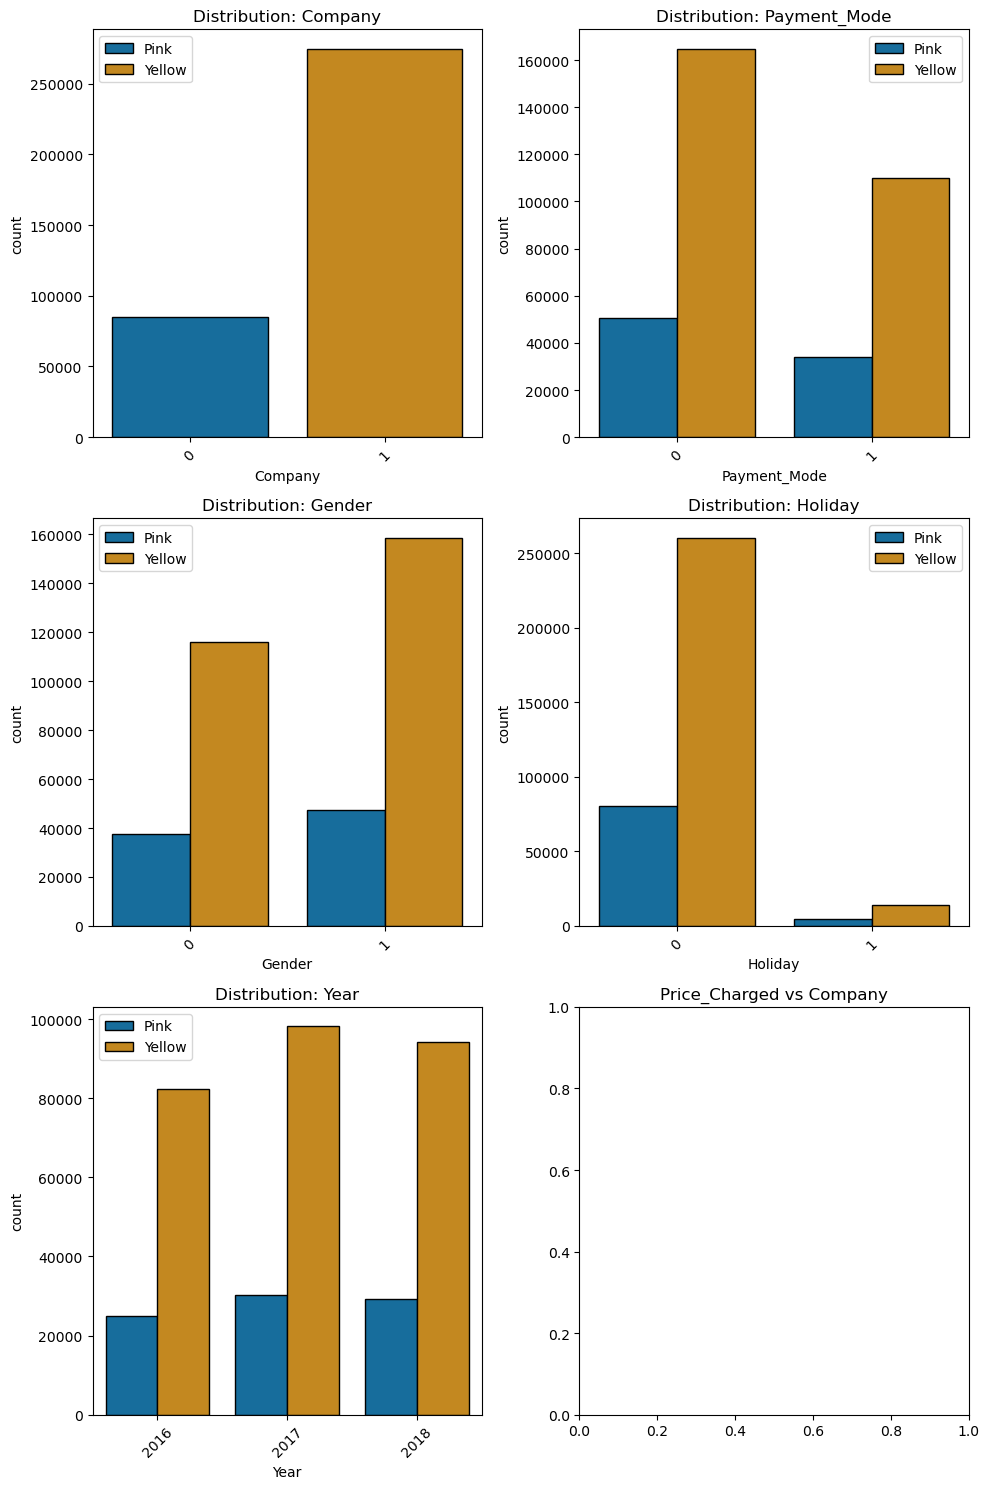

In [57]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10, 15))
axes = ax.flatten()  # Flatten the array of axes for easy iteration
# Define the color palette using Seaborn's color_palette function
colors = sns.color_palette("colorblind")

for i in range(len(categorical_features)):
    sns.countplot(
        x=categorical_features[i],
        data=data_encoded,
        hue='Company',
        palette=colors,
        edgecolor='black',
        ax=axes[i]
    )
    axes[i].set_title(f'Distribution: {categorical_features[i]}')
    axes[i].tick_params(axis='x', rotation=45)
    title = numerical_features[i] + ' vs Company'
    axes[i].legend(['Pink','Yellow'])
    plt.title(title);

plt.tight_layout()
plt.show()


In [58]:
mask3 = (data_encoded["Company"] == 0)
Pink_cab = data_encoded[mask3]
print(Pink_cab)
mask4 = (data_encoded["Company"] == 1)
Yellow_cab = data_encoded[mask4]

        Transaction_ID  Date_of_Travel  Company  City  KM_Travelled  \
0             10000011           42377        0     0         30.45   
1             10000012           42375        0     0         28.62   
2             10000013           42371        0     0          9.04   
3             10000014           42376        0     0         33.17   
4             10000015           42372        0     0          8.73   
...                ...             ...      ...   ...           ...   
357449        10437610           43106        0    18         13.56   
357450        10437611           43465        0    18         29.68   
357451        10437612           43107        0    18         28.50   
357452        10437614           43102        0    18         16.10   
357453        10437615           43105        0    18         22.20   

        Price_Charged  Cost_of_Trip  Customer_ID  Payment_Mode  Gender  ...  \
0              370.95       313.635        29290             0      

<Axes: >

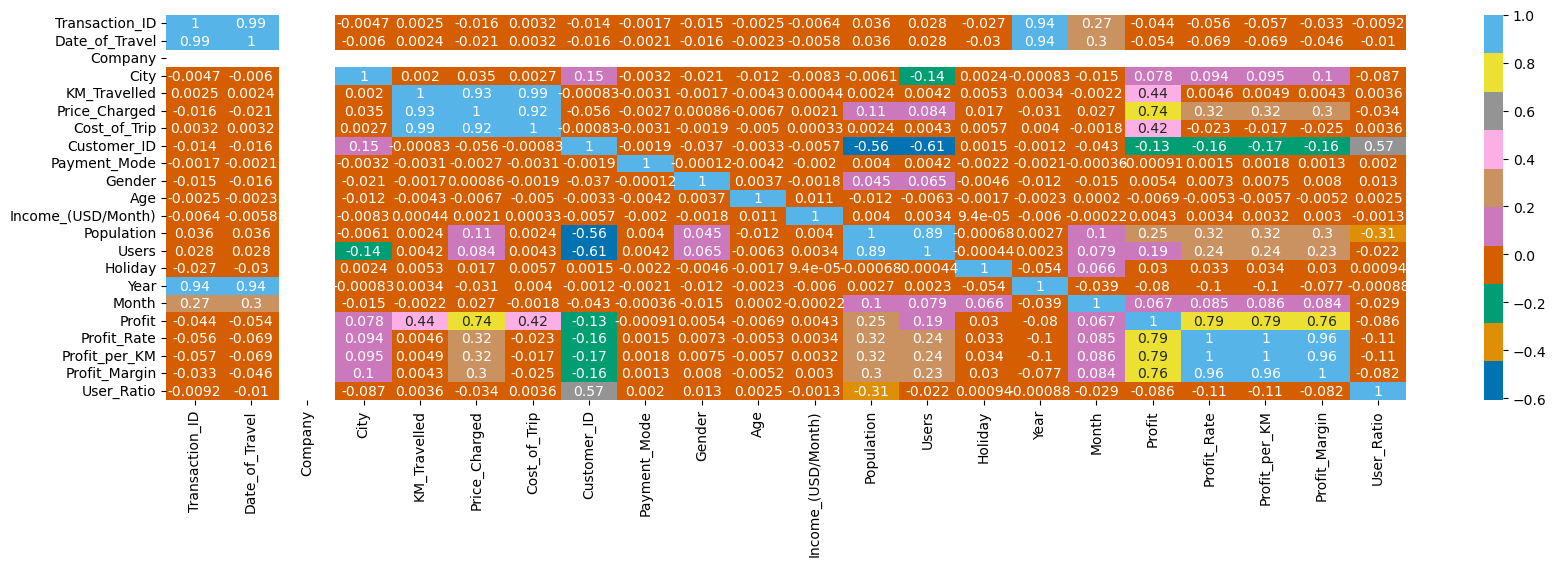

In [59]:
plt.figure(figsize = (20,5))
sns.heatmap(Pink_cab.corr(),cmap = colors,annot = True)

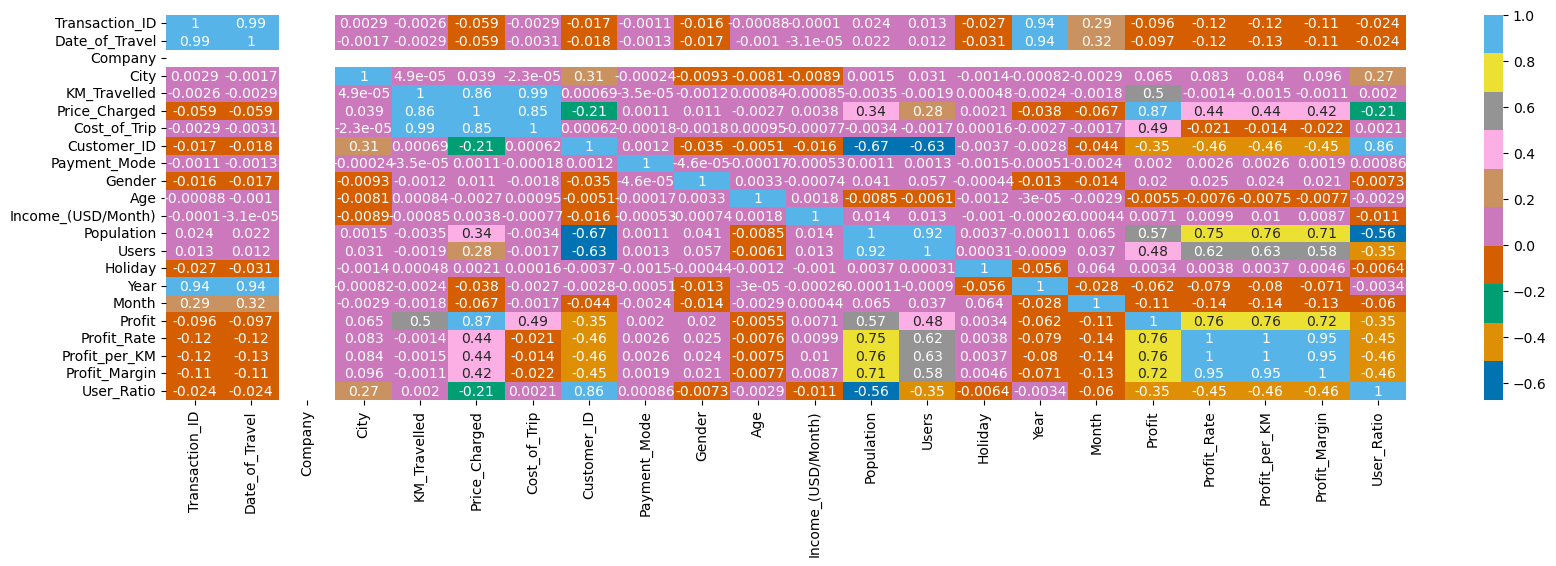

In [60]:
plt.figure(figsize = (20,5))
sns.heatmap(Yellow_cab.corr(),cmap = colors,annot = True);


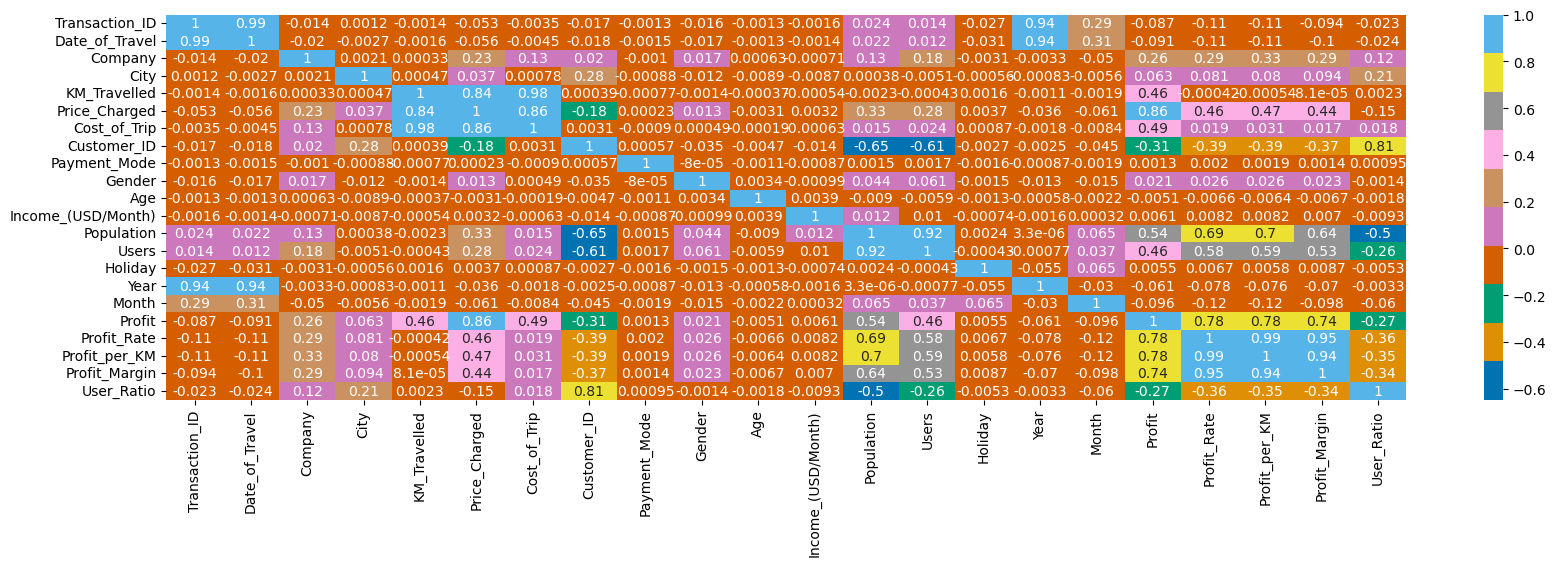

In [61]:
plt.figure(figsize = (20,5))
sns.heatmap(data_encoded.corr(),cmap = colors,annot = True);


#### "Which features have the most influence (positive or negative) on Profit for Pink Cab?"

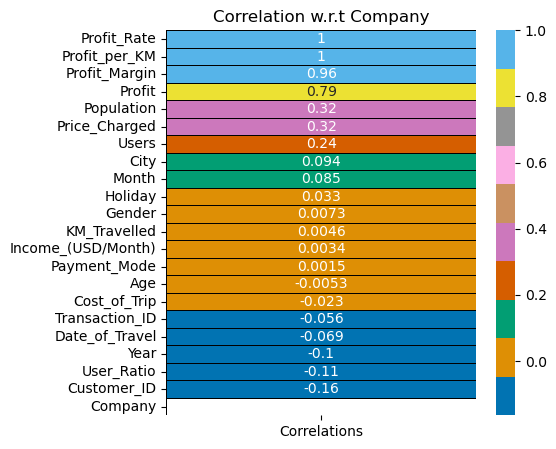

In [69]:
corr = Pink_cab.corrwith(Pink_cab['Profit_Rate']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlations']
plt.subplots(figsize = (5,5))
sns.heatmap(corr,annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black');
plt.title('Correlation w.r.t Company');


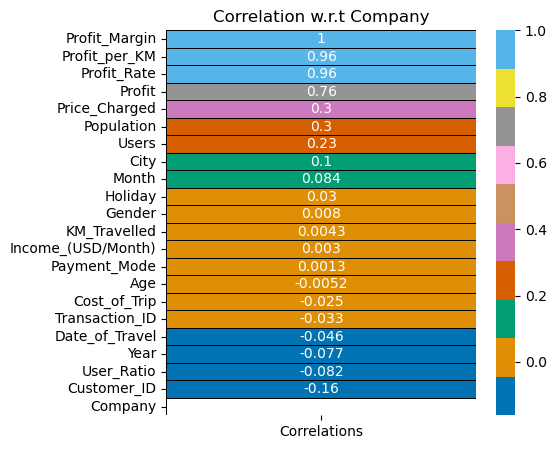

In [76]:
corr = Pink_cab.corrwith(Pink_cab['Profit_Margin']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlations']
plt.subplots(figsize = (5,5))
sns.heatmap(corr,annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black');
plt.title('Correlation w.r.t Company');


#### In Pink Cab, profit rate is weakly correlated to Price_Charged and population.
#### In Pink Cab, profit is strongly correlated to Price_Charged, highly correlated to KM travelled.

#### "Which features have the most influence (positive or negative) on Profit for Yellow Cab?"

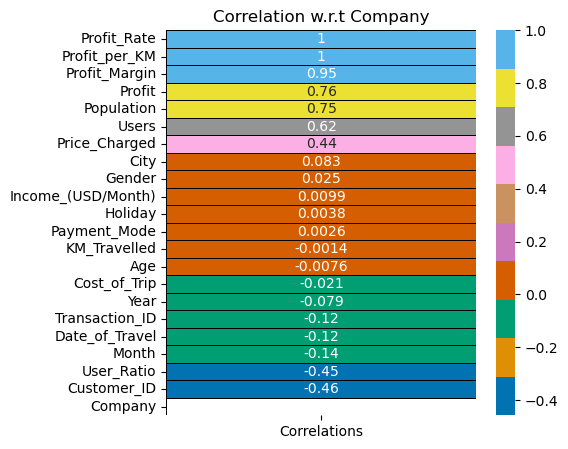

In [71]:
corr = Yellow_cab.corrwith(Yellow_cab['Profit_Rate']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlations']
plt.subplots(figsize = (5,5))
sns.heatmap(corr,annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black');
plt.title('Correlation w.r.t Company');


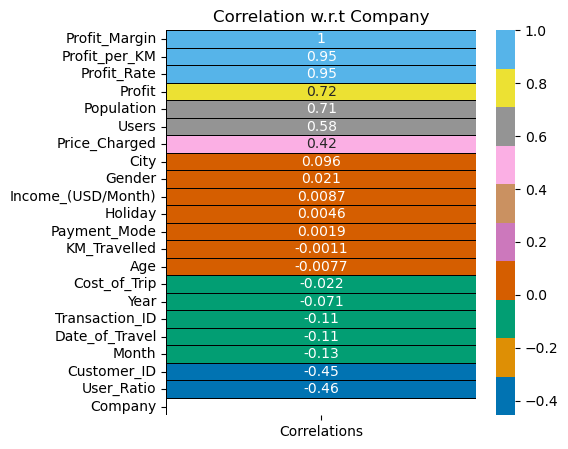

In [77]:
corr = Yellow_cab.corrwith(Yellow_cab['Profit_Margin']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlations']
plt.subplots(figsize = (5,5))
sns.heatmap(corr,annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black');
plt.title('Correlation w.r.t Company');


#### In yellow Cab, profit rate highly correlated to population and users and is moderately correlated to Price_Charged.

#### In yellow cab, profit is strongly correlated to Price_Charged, moderately correlated to Population and KM travelled.


### Since in both cabs, profit is strongly correlated to Price charged and moderately correlated to KM travelled. Let's check how does the scatter plot looks like.

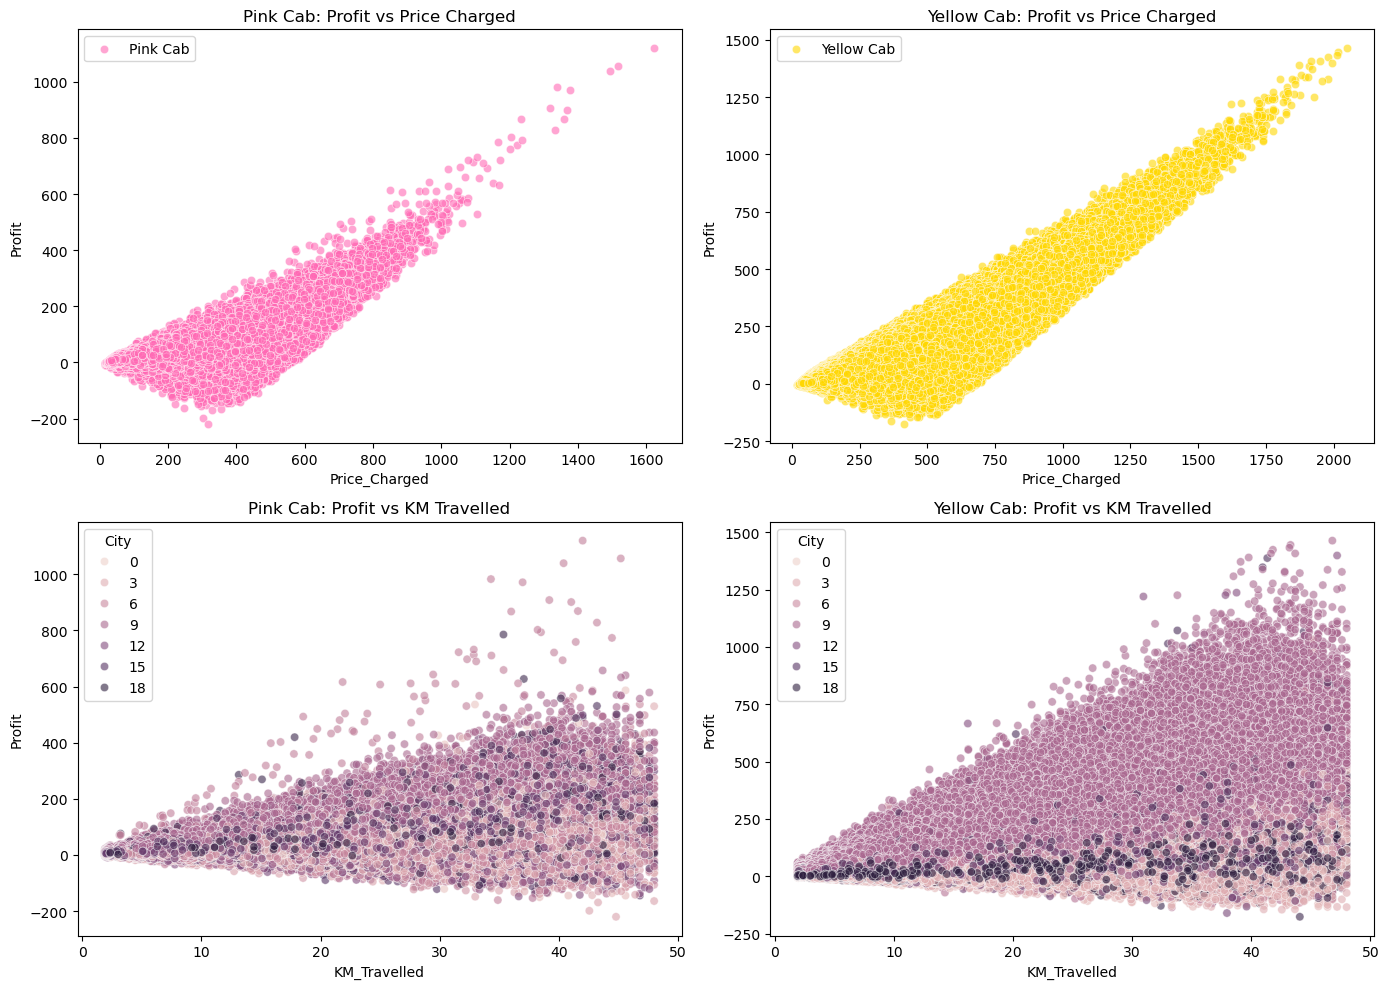

In [85]:
plt.figure(figsize=(14, 10))

# --- Plot 1: Profit vs Price Charged ---
plt.subplot(2, 2, 1)
sns.scatterplot(data=Pink_cab, x='Price_Charged', y='Profit', color='hotpink', alpha=0.6, label='Pink Cab')
plt.title('Pink Cab: Profit vs Price Charged')

plt.subplot(2, 2, 2)
sns.scatterplot(data=Yellow_cab, x='Price_Charged', y='Profit', color='gold', alpha=0.6, label='Yellow Cab')
plt.title('Yellow Cab: Profit vs Price Charged')

# --- Plot 2: Profit vs KM Travelled ---
plt.subplot(2, 2, 3)
sns.scatterplot(data=Pink_cab, x='KM_Travelled', y='Profit', color='hotpink', hue='City', alpha=0.6)
plt.title('Pink Cab: Profit vs KM Travelled')

plt.subplot(2, 2, 4)
sns.scatterplot(data=Yellow_cab, x='KM_Travelled', y='Profit', color='gold',hue='City', alpha=0.6)
plt.title('Yellow Cab: Profit vs KM Travelled')

plt.tight_layout()
plt.show()

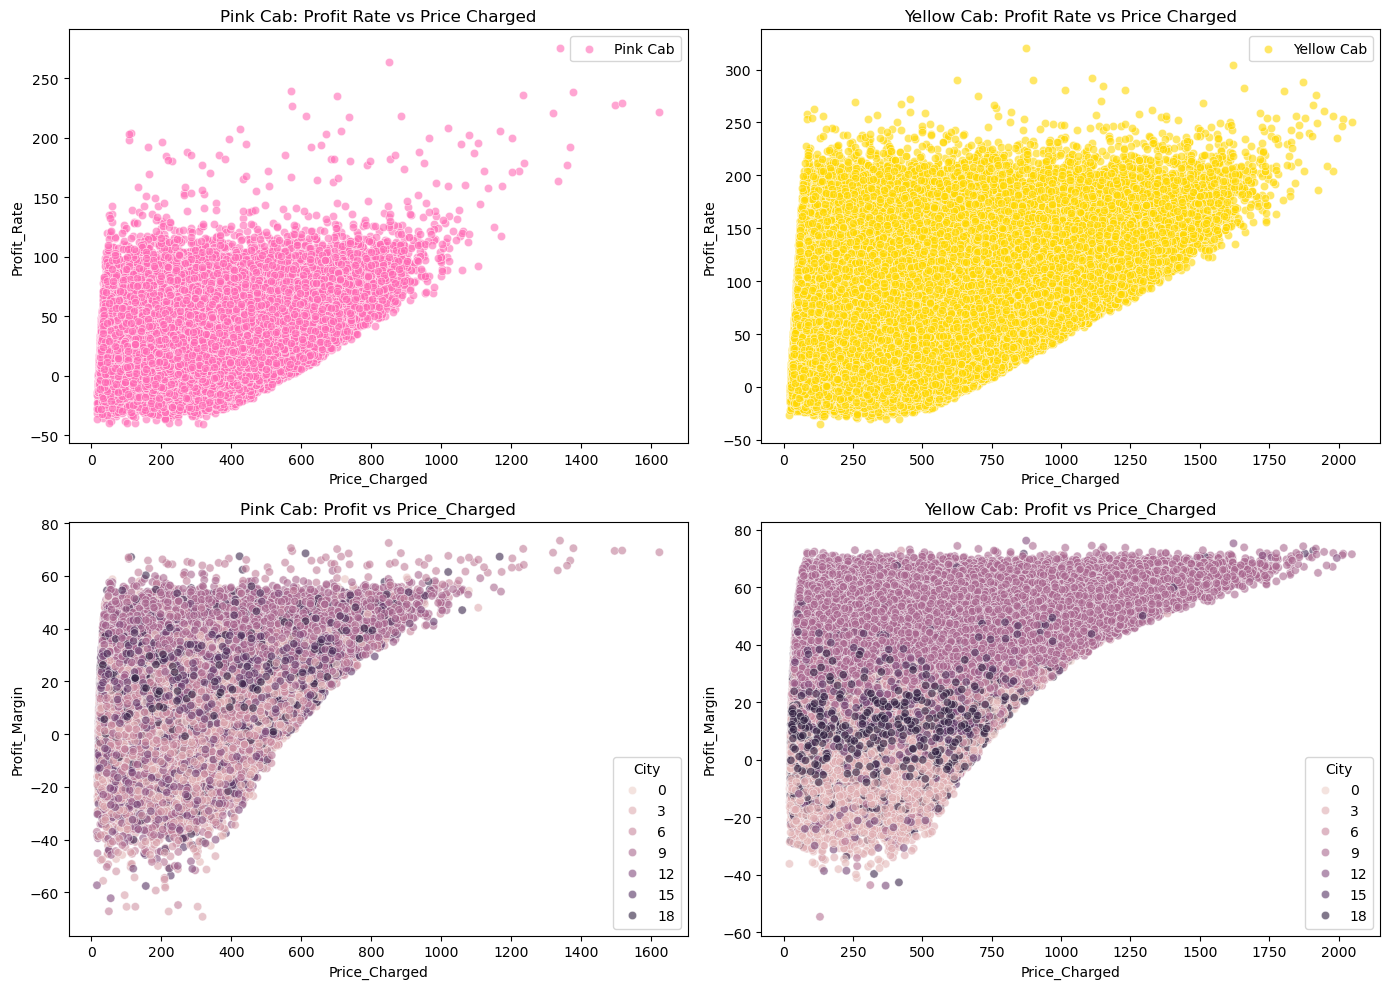

In [95]:
plt.figure(figsize=(14, 10))

# --- Plot 1: Profit Rate vs Price Charged ---
plt.subplot(2, 2, 1)
sns.scatterplot(data=Pink_cab, x='Price_Charged', y='Profit_Rate', color='hotpink', alpha=0.6, label='Pink Cab')
plt.title('Pink Cab: Profit Rate vs Price Charged')

plt.subplot(2, 2, 2)
sns.scatterplot(data=Yellow_cab, x='Price_Charged', y='Profit_Rate', color='gold', alpha=0.6, label='Yellow Cab')
plt.title('Yellow Cab: Profit Rate vs Price Charged')

# --- Plot 2: Profit Margin vs Price Charged ---
plt.subplot(2, 2, 3)
sns.scatterplot(data=Pink_cab, x='Price_Charged', y='Profit_Margin', color='hotpink', hue='City', alpha=0.6)
plt.title('Pink Cab: Profit Margin vs Price_Charged')

plt.subplot(2, 2, 4)
sns.scatterplot(data=Yellow_cab, x='Price_Charged', y='Profit_Margin', color='gold',hue='City', alpha=0.6)
plt.title('Yellow Cab: Profit Margin vs Price_Charged')


plt.tight_layout()
plt.show()


### Conclusion : Since profit increases with both price charged and kilometers traveled, and these values are higher for Yellow Cab, the company should consider investing in Yellow Cab for greater profitability in the cab industry.

(array([-50000.,      0.,  50000., 100000., 150000., 200000., 250000.,
        300000., 350000.]),
 [Text(-50000.0, 0, '−50000'),
  Text(0.0, 0, '0'),
  Text(50000.0, 0, '50000'),
  Text(100000.0, 0, '100000'),
  Text(150000.0, 0, '150000'),
  Text(200000.0, 0, '200000'),
  Text(250000.0, 0, '250000'),
  Text(300000.0, 0, '300000'),
  Text(350000.0, 0, '350000')])

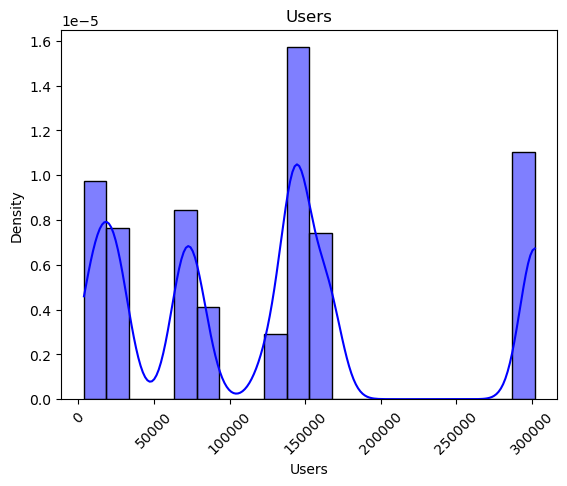

In [87]:
sns.histplot(Pink_cab_df["Users"], color='blue', kde=True, bins=20, stat='density')
plt.title('Users')
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, 'ATLANTA GA'),
  Text(1, 0, 'AUSTIN TX'),
  Text(2, 0, 'BOSTON MA'),
  Text(3, 0, 'CHICAGO IL'),
  Text(4, 0, 'DALLAS TX'),
  Text(5, 0, 'DENVER CO'),
  Text(6, 0, 'LOS ANGELES CA'),
  Text(7, 0, 'MIAMI FL'),
  Text(8, 0, 'NASHVILLE TN'),
  Text(9, 0, 'NEW YORK NY'),
  Text(10, 0, 'ORANGE COUNTY'),
  Text(11, 0, 'PHOENIX AZ'),
  Text(12, 0, 'PITTSBURGH PA'),
  Text(13, 0, 'SACRAMENTO CA'),
  Text(14, 0, 'SAN DIEGO CA'),
  Text(15, 0, 'SEATTLE WA'),
  Text(16, 0, 'SILICON VALLEY'),
  Text(17, 0, 'TUCSON AZ'),
  Text(18, 0, 'WASHINGTON DC')])

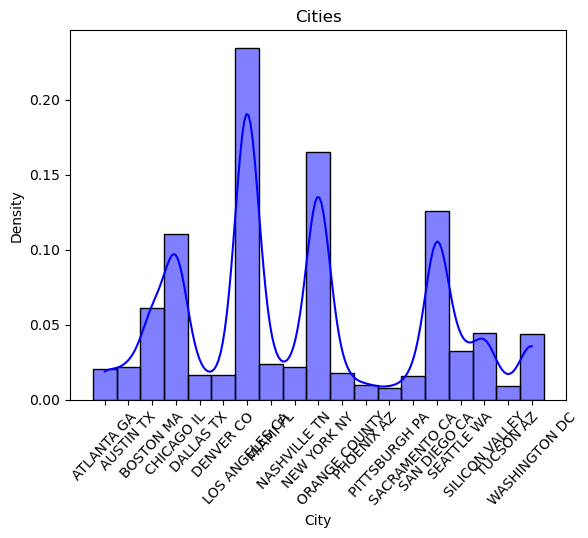

In [88]:
sns.histplot(Pink_cab_df["City"], color='blue', kde=True, bins=20, stat='density')
plt.title('Cities')
plt.xticks(rotation=47)

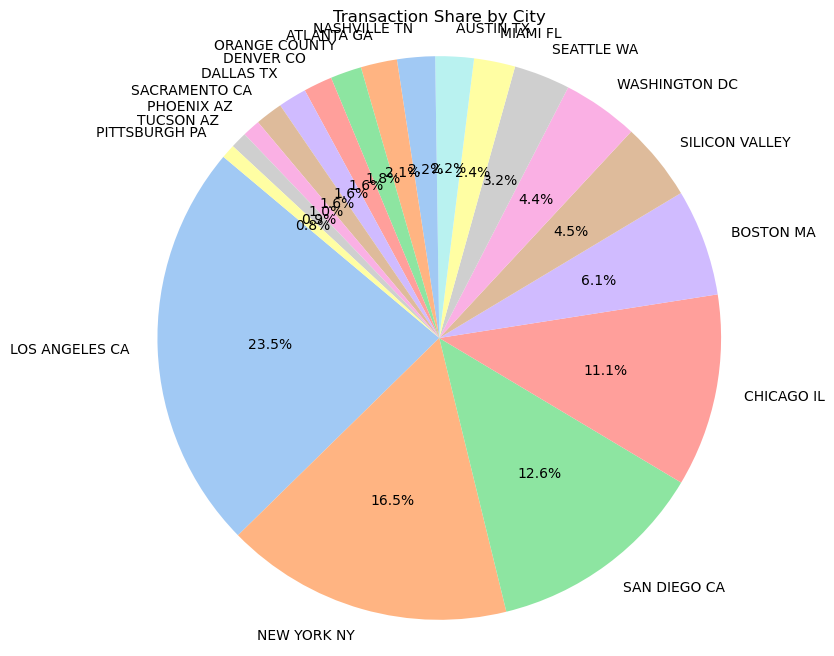

In [90]:
city_counts1 = Pink_cab_df['City'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(city_counts1, labels=city_counts1.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Transaction Share by City')
plt.axis('equal')  # Equal aspect ratio ensures pie is a circle.
plt.xticks(rotation=47)
plt.show()


#### Most cab transactions occurred in LOS ANGELES CA in the Pink Cab dataset.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, 'ATLANTA GA'),
  Text(1, 0, 'AUSTIN TX'),
  Text(2, 0, 'BOSTON MA'),
  Text(3, 0, 'CHICAGO IL'),
  Text(4, 0, 'DALLAS TX'),
  Text(5, 0, 'DENVER CO'),
  Text(6, 0, 'LOS ANGELES CA'),
  Text(7, 0, 'MIAMI FL'),
  Text(8, 0, 'NASHVILLE TN'),
  Text(9, 0, 'NEW YORK NY'),
  Text(10, 0, 'ORANGE COUNTY'),
  Text(11, 0, 'PHOENIX AZ'),
  Text(12, 0, 'PITTSBURGH PA'),
  Text(13, 0, 'SACRAMENTO CA'),
  Text(14, 0, 'SAN DIEGO CA'),
  Text(15, 0, 'SEATTLE WA'),
  Text(16, 0, 'SILICON VALLEY'),
  Text(17, 0, 'TUCSON AZ'),
  Text(18, 0, 'WASHINGTON DC')])

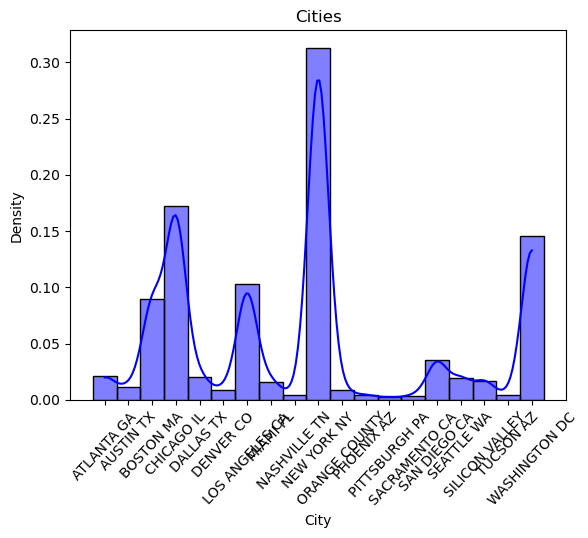

In [91]:
sns.histplot(Yellow_cab_df["City"], color='blue', kde=True, bins=20, stat='density')
plt.title('Cities')
plt.xticks(rotation=47)

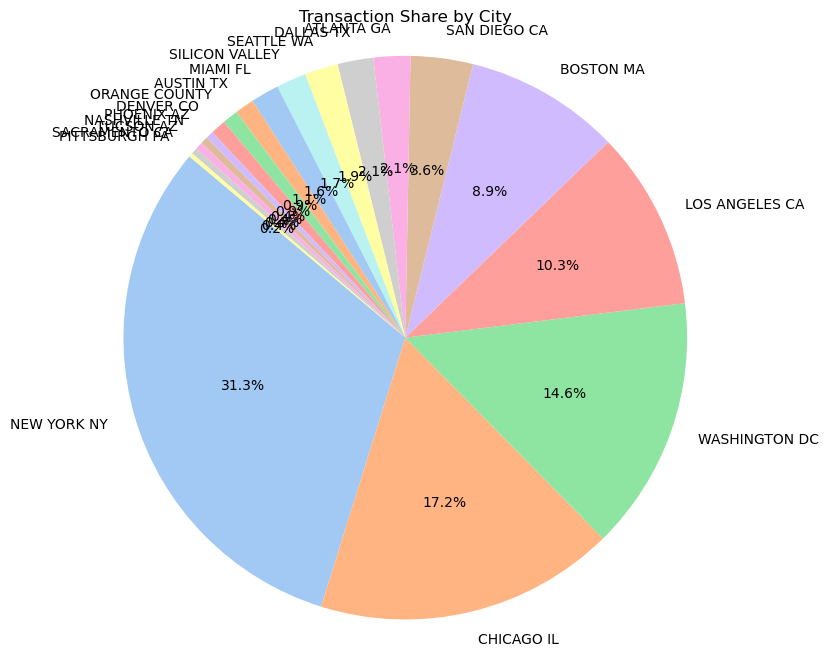

In [93]:
city_counts2 = Yellow_cab_df['City'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(city_counts2, labels=city_counts2.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Transaction Share by City')
plt.axis('equal')  # Equal aspect ratio ensures pie is a circle.
plt.xticks(rotation=47)
plt.show()


#### Most cab transactions occurred in New York in the Yellow Cab dataset.

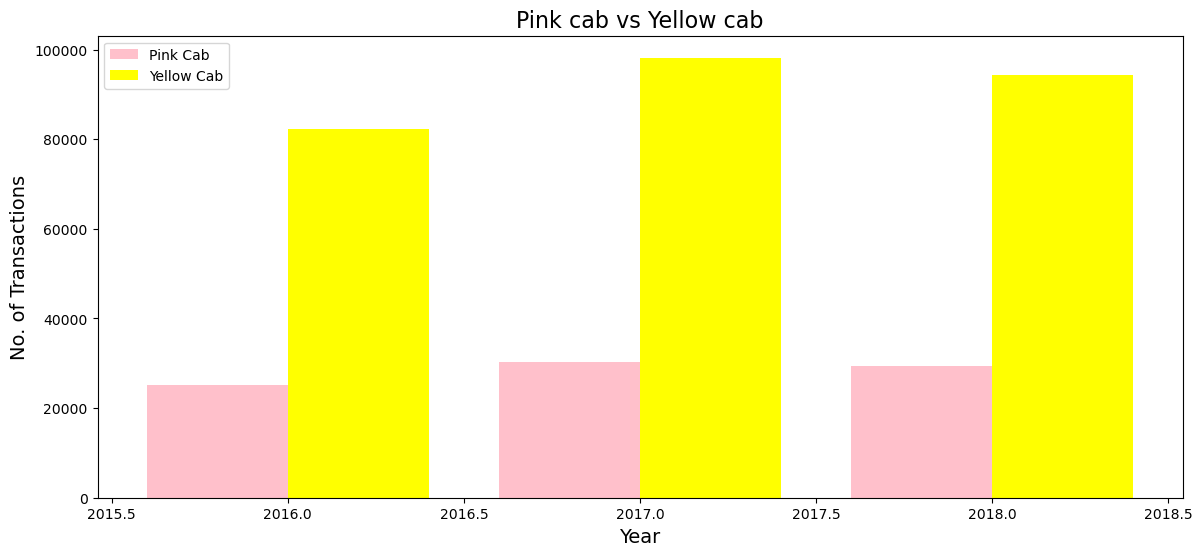

In [94]:
plot1 = data_encoded[data_encoded.Company==0].groupby('Year').Transaction_ID.count()
plot2 = data_encoded[data_encoded.Company==1].groupby('Year').Transaction_ID.count()
plt.figure(figsize=(14,6))
ax = plt.subplot(111)
ax.bar(plot1.index-0.2, plot1.values, width=0.4, color='pink', align='center',label='Pink Cab')
ax.bar(plot1.index+0.2, plot2.values, width=0.4, color='yellow', align='center',label='Yellow Cab')
plt.title("Pink cab vs Yellow cab",fontsize = 16)
plt.ylabel('No. of Transactions',fontsize = 14)
plt.xlabel('Year',fontsize = 14)
plt.legend()
plt.show()